In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('dpe-tertiaire.csv')

C:\Users\tomde\AppData\Local\Temp\ipykernel_39800\1864393876.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('dpe-tertiaire.csv')


In [ ]:
df.head()

,id,numero_dpe,usr_diagnostiqueur_id,usr_logiciel_id,tr001_modele_dpe_id,nom_methode_dpe,version_methode_dpe,nom_methode_etude_thermique,version_methode_etude_thermique,date_visite_diagnostiqueur,...,tv017_zone_hiver_code,tv017_zone_hiver_t_ext_moyen,tv017_zone_hiver_peta_cw,tv017_zone_hiver_dh14,tv017_zone_hiver_prs1,tv018_zone_ete_code,tv018_zone_ete_sclim_inf_150,tv018_zone_ete_sclim_sup_150,tv018_zone_ete_rclim_autres_etages,tv018_zone_ete_rclim_dernier_etage
0,179,1330V8000001A,3710,3,8,Méthode Facture,NaN,\N,\N,2013-04-10,...,H3,9.65,14.5,22200,2.9,Ed,5,7,4.0,5
1,355,1356V4000001E,444,3,4,Facture,facture,\N,\N,2013-04-12,...,H2,8.08,12.0,33300,3.4,Ea,2,4,1.5,2
2,410,1317V7000001E,7374,2,7,3CL - DPE,V2012,\N,\N,2013-04-11,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4
3,429,1369V4000001I,6931,7,4,3CL,Version 1.3,\N,\N,2013-04-02,...,H1,6.58,10.5,42030,3.6,Ec,4,6,3.0,4
4,470,1364V8000001H,231,3,8,Méthode Facture,NaN,\N,\N,2013-04-15,...,H2,8.08,12.0,33300,3.4,Ec,4,6,3.0,4


: 

In [3]:
df2=pd.read_csv("dpe-v2-tertiaire-2.csv")

In [4]:
from pyproj import Transformer

# Définir les systèmes de projection
lambert93 = "EPSG:2154"  # Lambert 93 (France)
wgs84 = "EPSG:4326"      # WGS 84 (Latitude/Longitude)

# Créer le transformateur
transformer = Transformer.from_crs(lambert93, wgs84, always_xy=True)

# Fonction qui transforme simultanément les coordonnées X et Y en longitude et latitude
def convert_xy(row):
    x = row['Coordonnée_cartographique_X_(BAN)']
    y = row['Coordonnée_cartographique_Y_(BAN)']
    lon, lat = transformer.transform(x, y)  # transformation simultanée
    return pd.Series({'longitude': lon, 'latitude': lat})

# Appliquer la transformation sur chaque ligne de df2
df2[['longitude', 'latitude']] = df2.apply(convert_xy, axis=1)

# Vérification rapide des résultats
print(df2[['Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'longitude', 'latitude']].head())


   Coordonnée_cartographique_X_(BAN)  Coordonnée_cartographique_Y_(BAN)  \
0                          712942.36                         6516058.35   
1                          828010.81                         6499110.54   
2                         1012776.32                         6860453.93   
3                          923354.37                         6303377.93   
4                          617387.30                         6930052.21   

   longitude   latitude  
0   3.166455  45.743998  
1   4.641613  45.579526  
2   7.257632  48.768276  
3   5.775299  43.794088  
4   1.860749  49.464506  


In [5]:
import pandas as pd


mapping = {
    "N°DPE": "numero_dpe",
    "Date_réception_DPE": "date_reception_dpe",
    "Date_établissement_DPE": "date_etablissement_dpe",
    "Date_visite_diagnostiqueur": "date_visite_diagnostiqueur",
    "Version_DPE": "version_methode_dpe",
    "Méthode_du_DPE": "nom_methode_dpe",
    "Etiquette_DPE": "classe_consommation_energie",
    "Etiquette_GES": "classe_estimation_ges",
    "Conso_kWhep/m²/an": "consommation_energie",
    "Emission_GES_kgCO2/m²/an": "estimation_ges",
    "Année_construction": "annee_construction",
    "Catégorie_ERP": "tr012_categorie_erp_id",
    "Secteur_activité": "secteur_activite",
    "Surface_(SHON)": "shon",
    "Surface_utile": "surface_habitable",
    "Adresse_brute": "geo_adresse",
    "Code_INSEE_(BAN)": "code_insee_commune",
    "N°_voie_(BAN)": "numero_rue",
    "Identifiant__BAN": "geo_id",
    "Score_BAN": "geo_score",
    "Nom__rue_(BAN)": "nom_rue",
    "Code_postal_(brut)": "code_postal",  # à convertir ensuite en int
    "N°_étage_appartement": "etage",
    "Complément_d'adresse_bâtiment": "batiment",
    "Cage_d'escalier": "escalier",
    "Nom__commune_(Brut)": "commune",
    "N°_département_(BAN)": "tv016_departement_code"
}


df2_renamed = df2.rename(columns=mapping)


print("Colonnes de df2 renommé :", df2_renamed.columns.tolist())
print("Colonnes de df :", df.columns.tolist())


common_cols = df2_renamed.columns.intersection(df.columns)
print("Colonnes communes :", common_cols.tolist())


df3 = pd.concat([df[common_cols], df2_renamed[common_cols]], axis=0, ignore_index=True)

df3.columns



Colonnes de df2 renommé : ['numero_dpe', 'date_reception_dpe', 'date_etablissement_dpe', 'date_visite_diagnostiqueur', 'Modèle_DPE', 'N°_DPE_remplacé', 'Date_fin_validité_DPE', 'version_methode_dpe', 'N°_DPE_immeuble_associé', 'nom_methode_dpe', 'N°_immatriculation_copropriété', 'Invariant_fiscal_logement', 'classe_consommation_energie', 'classe_estimation_ges', 'consommation_energie', 'estimation_ges', 'annee_construction', 'tr012_categorie_erp_id', 'Période_construction', 'secteur_activite', 'Nombre_occupant', 'shon', 'surface_habitable', 'Type_énergie_principale_chauffage', 'geo_adresse', 'Nom__commune_(BAN)', 'code_insee_commune', 'numero_rue', 'geo_id', 'Adresse_(BAN)', 'Code_postal_(BAN)', 'geo_score', 'nom_rue', 'Coordonnée_cartographique_X_(BAN)', 'Coordonnée_cartographique_Y_(BAN)', 'code_postal', 'etage', 'Nom_résidence', 'batiment', 'escalier', "Complément_d'adresse_logement", 'Statut_géocodage', 'commune', 'tv016_departement_code', 'N°_région_(BAN)', 'Conso_é_finale_énergie

Index(['numero_dpe', 'date_reception_dpe', 'date_etablissement_dpe',
       'date_visite_diagnostiqueur', 'version_methode_dpe', 'nom_methode_dpe',
       'classe_consommation_energie', 'classe_estimation_ges',
       'consommation_energie', 'estimation_ges', 'annee_construction',
       'tr012_categorie_erp_id', 'secteur_activite', 'shon',
       'surface_habitable', 'geo_adresse', 'code_insee_commune', 'numero_rue',
       'geo_id', 'geo_score', 'nom_rue', 'code_postal', 'etage', 'batiment',
       'escalier', 'commune', 'tv016_departement_code', 'longitude',
       'latitude'],
      dtype='object')

In [6]:
def clean_date_column(date_series):
    
    date_clean = date_series.astype(str).str.strip().str.split().str[0]
    dates = pd.to_datetime(date_clean, format='%Y-%m-%d', errors='raise')
  
    return dates.dt.strftime('%Y-%m-%d')

df3['date_reception_dpe'] = clean_date_column(df3['date_reception_dpe'])

In [7]:
df3['date_visite_diagnostiqueur'] = pd.to_datetime(df3['date_visite_diagnostiqueur'], errors='coerce')
df3['year'] = df3['date_visite_diagnostiqueur'].dt.year
df3['month'] = df3['date_visite_diagnostiqueur'].dt.month
df3['day'] = df3['date_visite_diagnostiqueur'].dt.day
df3 = df3.set_index('date_visite_diagnostiqueur').sort_index()
df3.head()

,numero_dpe,date_reception_dpe,date_etablissement_dpe,version_methode_dpe,nom_methode_dpe,classe_consommation_energie,classe_estimation_ges,consommation_energie,estimation_ges,annee_construction,...,etage,batiment,escalier,commune,tv016_departement_code,longitude,latitude,year,month,day
date_visite_diagnostiqueur,,,,,,,,,,,,,,,,,,,,,
1899-12-30,1531N2000008W,2015-06-14,2015-06-14,V2012,FACTURE - DPE,B,A,53.69,1.72,2015.0,...,NaN,NaN,NaN,Tournefeuille,31,1.313928,43.594434,1899.0,12.0,30.0
1899-12-30,9992V8000001W,2014-02-21,1899-12-30,Version 1.3,3CL,G,C,633.79,20.64,1990.0,...,\N,\N,\N,FONTENAY AUX ROSES,92,NaN,NaN,1899.0,12.0,30.0
1899-12-30,1830N1002161@,2018-10-03,2018-10-03,V2012,FACTURE - DPE,B,A,77.27,2.72,2018.0,...,NaN,NaN,NaN,QUISSAC,30,NaN,NaN,1899.0,12.0,30.0
1899-12-30,2031N2000027T,2020-11-28,2020-11-28,V2012,FACTURE - DPE,E,D,241.53,29.59,2020.0,...,NaN,NaN,NaN,ESCANECRABE,31,NaN,NaN,1899.0,12.0,30.0
1957-12-07,1716V4000044L,2017-12-11,2017-12-11,V2012,FACTURE - DPE,N,N,0.00,0.00,1948.0,...,NaN,NaN,NaN,Ruffec,16,NaN,NaN,1957.0,12.0,7.0


In [8]:
mapping = {
    "Bureau, Administration, Enseignement": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Commerce": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Bureaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "bureaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Centres Commerciaux": "Centre commercial",
    "Occupation continue (hôpitaux, hôtels, intern": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Industrie": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    " Bureaux, administration, enseignement": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "enseignement": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Local commercial": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Artisanat": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Magasin de vente": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "commerce": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Restaurant": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Structure d’accueil pour personnes âgées": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "COMMERCE": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "établissement de santé": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "administration": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Autre bâtiment de culture et loisirs": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "salles de sport": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Etablissements sanitaires : Hôpitaux et clini": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "bureaux, services administratifs, enseignemen": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Local professionnel": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Enseignement Primaire / Secondaire": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Centre commercial": "Centre commercial",
    "LOCAL PROFESSIONNEL": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Hôtel": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Etablissements sociaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "Locaux sportifs": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Local Commercial": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Banque": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    " Bâtiment à occupation continue": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Établissement de soins": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Salle à usage multiple": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "restaurant": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Restauration": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "Résidence tourisme": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "W : Administrations, banques, bureaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "U : Établissements de soins": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "M : Magasins de vente, centres commerciaux": "Centre commercial",
    "N : Restaurants et débits de boisson": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "J : Structures d’accueil pour personnes âgées ou personnes handicapées": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "R : Établissements d’éveil, d’enseignement, de formation, centres de vacances, centres de loisirs sans hébergement": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "T : Salles d'exposition à vocation commerciale": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "GHW : Bureaux": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "locaux d'entreprise (bureaux)": "Bâtiment à usage principale de bureau, d'administration ou d'enseignement",
    "P : Salles de danse et salles de jeux": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "O : Hôtels et pensions de famille": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "X : Établissements sportifs couverts": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "L : Salles d'auditions, de conférences, de réunions, de spectacles ou à usage multiple": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "V : Établissements de divers cultes": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "OA : Hôtels-restaurants d'Altitude": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "Y : Musées": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "PA : Établissements de Plein Air": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "GHU : Usage sanitaire": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "S : Bibliothèques, centres de documentation": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "GA : Gares Accessibles au public (chemins de fer, téléphériques, remonte-pentes...)": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)",
    "GHO : Hôtel": "Bâtiment à occupation continue (par exemple: hopitaux, hôtels, internats, maisons de retraite, etc)",
    "GHS : Dépôt d'archives": "Autres cas (par exemple: théâtres, salles de sport, restauration, commerces individuels, etc)"
}

# Application du mapping sur la colonne 'secteur_activite'
df3['asset_cre'] = df3['secteur_activite'].map(mapping)

# Optionnel : gérer les valeurs non mappées
df3['asset_cre'] = df3['asset_cre'].fillna('Autres')


asset_cre et secteur activite equivalents

In [9]:
df3.drop('secteur_activite',axis=1,inplace=True)

In [10]:
df3.shape

(881719, 31)

In [11]:
pd.set_option('display.max_column',33)
pd.set_option('display.max_row',100)
df3.head()

,numero_dpe,date_reception_dpe,date_etablissement_dpe,version_methode_dpe,nom_methode_dpe,classe_consommation_energie,classe_estimation_ges,consommation_energie,estimation_ges,annee_construction,tr012_categorie_erp_id,shon,surface_habitable,geo_adresse,code_insee_commune,numero_rue,geo_id,geo_score,nom_rue,code_postal,etage,batiment,escalier,commune,tv016_departement_code,longitude,latitude,year,month,day,asset_cre
date_visite_diagnostiqueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1899-12-30,1531N2000008W,2015-06-14,2015-06-14,V2012,FACTURE - DPE,B,A,53.69,1.72,2015.0,\N,\N,\N,4 Impasse Denis Papin 31170 Tournefeuille,31557,NaN,31557_1495_00004,0.88,4 Impasse Denis PapinTournefeuille,31170,NaN,NaN,NaN,Tournefeuille,31,1.313928,43.594434,1899.0,12.0,30.0,Autres
1899-12-30,9992V8000001W,2014-02-21,1899-12-30,Version 1.3,3CL,G,C,633.79,20.64,1990.0,\N,0.00,129.80,NaN,63000,"22 à 32, rue Boucicaut",NaN,0.00,"22 à 32, rue Boucicaut",92260,\N,\N,\N,FONTENAY AUX ROSES,92,NaN,NaN,1899.0,12.0,30.0,Autres
1899-12-30,1830N1002161@,2018-10-03,2018-10-03,V2012,FACTURE - DPE,B,A,77.27,2.72,2018.0,\N,\N,\N,NaN,30210,NaN,NaN,0.00,Grand Rue,30260,NaN,NaN,NaN,QUISSAC,30,NaN,NaN,1899.0,12.0,30.0,Autres
1899-12-30,2031N2000027T,2020-11-28,2020-11-28,V2012,FACTURE - DPE,E,D,241.53,29.59,2020.0,\N,\N,\N,NaN,31170,NaN,NaN,0.00,Route de Toulouse D17,31350,NaN,NaN,NaN,ESCANECRABE,31,NaN,NaN,1899.0,12.0,30.0,Autres
1957-12-07,1716V4000044L,2017-12-11,2017-12-11,V2012,FACTURE - DPE,N,N,0.00,0.00,1948.0,\N,\N,113.31,NaN,16335,NaN,NaN,0.00,ZI Nord,16700,NaN,NaN,NaN,Ruffec,16,NaN,NaN,1957.0,12.0,7.0,Autres


In [12]:
df3.dtypes.to_frame()

,0
numero_dpe,object
date_reception_dpe,object
date_etablissement_dpe,object
version_methode_dpe,object
nom_methode_dpe,object
classe_consommation_energie,object
classe_estimation_ges,object
consommation_energie,float64
estimation_ges,float64
annee_construction,float64


In [13]:
df3[['shon', 'surface_habitable']] = df3[['shon', 'surface_habitable']].replace('\\N', np.nan)
df3[['shon', 'surface_habitable']] = df3[['shon', 'surface_habitable']].astype(float)

<Axes: ylabel='count'>

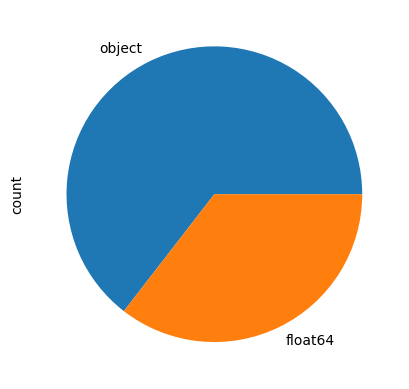

In [14]:
df3.dtypes.value_counts().plot.pie()


In [15]:
import seaborn as sns

<Axes: ylabel='date_visite_diagnostiqueur'>

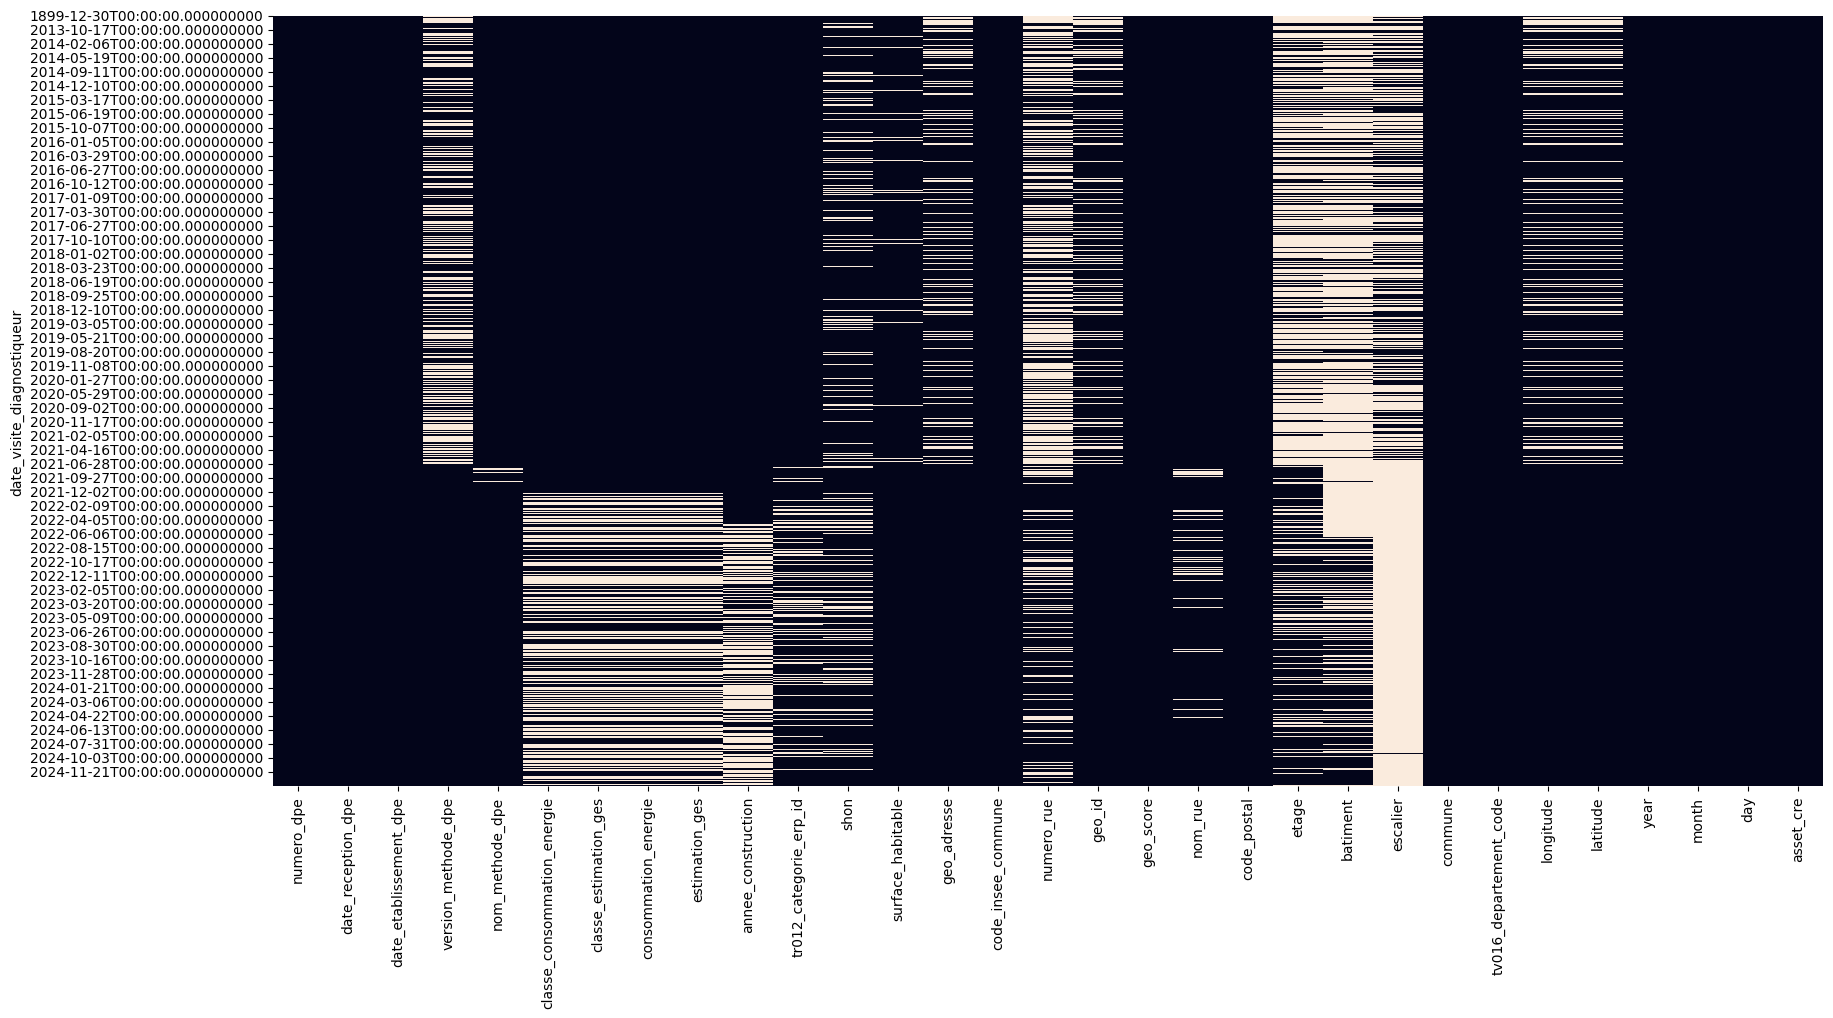

In [16]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.isna(),cbar=False)

In [17]:
(df3.isna().sum()/df3.shape[0]).sort_values(ascending=True).to_frame()

,0
numero_dpe,0.000000
date_etablissement_dpe,0.000000
asset_cre,0.000000
date_reception_dpe,0.000000
year,0.000014
month,0.000014
day,0.000014
code_postal,0.000446
commune,0.000464
geo_score,0.001039


Suppression des colonnes avec trop de NaN

In [18]:
df3 = df3[df3.columns[df3.isna().sum() / df3.shape[0] <= 0.49]]


In [19]:
df3.head()

,numero_dpe,date_reception_dpe,date_etablissement_dpe,version_methode_dpe,nom_methode_dpe,classe_consommation_energie,classe_estimation_ges,consommation_energie,estimation_ges,annee_construction,tr012_categorie_erp_id,shon,surface_habitable,geo_adresse,code_insee_commune,numero_rue,geo_id,geo_score,nom_rue,code_postal,commune,tv016_departement_code,longitude,latitude,year,month,day,asset_cre
date_visite_diagnostiqueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1899-12-30,1531N2000008W,2015-06-14,2015-06-14,V2012,FACTURE - DPE,B,A,53.69,1.72,2015.0,\N,NaN,NaN,4 Impasse Denis Papin 31170 Tournefeuille,31557,NaN,31557_1495_00004,0.88,4 Impasse Denis PapinTournefeuille,31170,Tournefeuille,31,1.313928,43.594434,1899.0,12.0,30.0,Autres
1899-12-30,9992V8000001W,2014-02-21,1899-12-30,Version 1.3,3CL,G,C,633.79,20.64,1990.0,\N,0.0,129.80,NaN,63000,"22 à 32, rue Boucicaut",NaN,0.00,"22 à 32, rue Boucicaut",92260,FONTENAY AUX ROSES,92,NaN,NaN,1899.0,12.0,30.0,Autres
1899-12-30,1830N1002161@,2018-10-03,2018-10-03,V2012,FACTURE - DPE,B,A,77.27,2.72,2018.0,\N,NaN,NaN,NaN,30210,NaN,NaN,0.00,Grand Rue,30260,QUISSAC,30,NaN,NaN,1899.0,12.0,30.0,Autres
1899-12-30,2031N2000027T,2020-11-28,2020-11-28,V2012,FACTURE - DPE,E,D,241.53,29.59,2020.0,\N,NaN,NaN,NaN,31170,NaN,NaN,0.00,Route de Toulouse D17,31350,ESCANECRABE,31,NaN,NaN,1899.0,12.0,30.0,Autres
1957-12-07,1716V4000044L,2017-12-11,2017-12-11,V2012,FACTURE - DPE,N,N,0.00,0.00,1948.0,\N,NaN,113.31,NaN,16335,NaN,NaN,0.00,ZI Nord,16700,Ruffec,16,NaN,NaN,1957.0,12.0,7.0,Autres


<Axes: ylabel='date_visite_diagnostiqueur'>

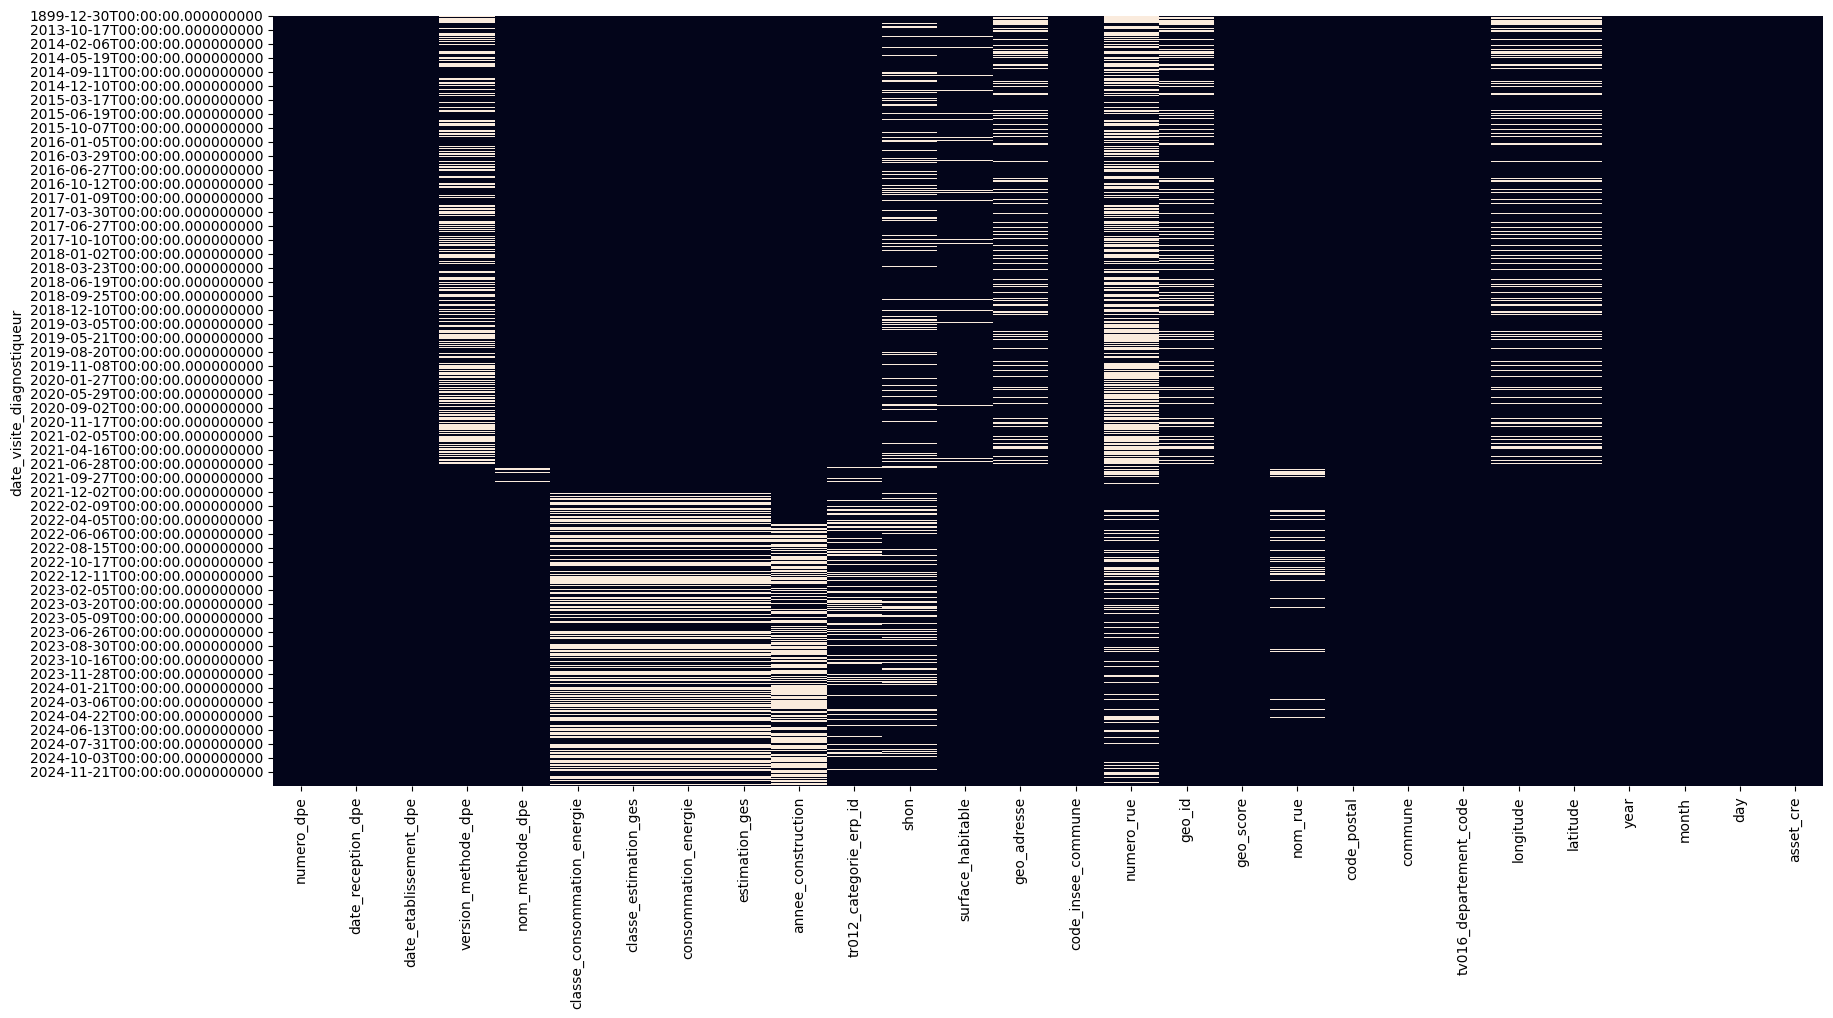

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.isna(),cbar=False)

In [21]:
df3.head()

,numero_dpe,date_reception_dpe,date_etablissement_dpe,version_methode_dpe,nom_methode_dpe,classe_consommation_energie,classe_estimation_ges,consommation_energie,estimation_ges,annee_construction,tr012_categorie_erp_id,shon,surface_habitable,geo_adresse,code_insee_commune,numero_rue,geo_id,geo_score,nom_rue,code_postal,commune,tv016_departement_code,longitude,latitude,year,month,day,asset_cre
date_visite_diagnostiqueur,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1899-12-30,1531N2000008W,2015-06-14,2015-06-14,V2012,FACTURE - DPE,B,A,53.69,1.72,2015.0,\N,NaN,NaN,4 Impasse Denis Papin 31170 Tournefeuille,31557,NaN,31557_1495_00004,0.88,4 Impasse Denis PapinTournefeuille,31170,Tournefeuille,31,1.313928,43.594434,1899.0,12.0,30.0,Autres
1899-12-30,9992V8000001W,2014-02-21,1899-12-30,Version 1.3,3CL,G,C,633.79,20.64,1990.0,\N,0.0,129.80,NaN,63000,"22 à 32, rue Boucicaut",NaN,0.00,"22 à 32, rue Boucicaut",92260,FONTENAY AUX ROSES,92,NaN,NaN,1899.0,12.0,30.0,Autres
1899-12-30,1830N1002161@,2018-10-03,2018-10-03,V2012,FACTURE - DPE,B,A,77.27,2.72,2018.0,\N,NaN,NaN,NaN,30210,NaN,NaN,0.00,Grand Rue,30260,QUISSAC,30,NaN,NaN,1899.0,12.0,30.0,Autres
1899-12-30,2031N2000027T,2020-11-28,2020-11-28,V2012,FACTURE - DPE,E,D,241.53,29.59,2020.0,\N,NaN,NaN,NaN,31170,NaN,NaN,0.00,Route de Toulouse D17,31350,ESCANECRABE,31,NaN,NaN,1899.0,12.0,30.0,Autres
1957-12-07,1716V4000044L,2017-12-11,2017-12-11,V2012,FACTURE - DPE,N,N,0.00,0.00,1948.0,\N,NaN,113.31,NaN,16335,NaN,NaN,0.00,ZI Nord,16700,Ruffec,16,NaN,NaN,1957.0,12.0,7.0,Autres


Suppression des colonnes inutiles ou innaccessibles pour le projet 

In [22]:
Inutile = ['numero_dpe','date_reception_dpe','date_etablissement_dpe','classe_estimation_ges','classe_consommation_energie','consommation_energie']

In [23]:
df3=df3.drop(Inutile,axis=1)


In [24]:
df3[['geo_id','code_postal','code_insee_commune','geo_adresse','nom_rue']].head(10)

,geo_id,code_postal,code_insee_commune,geo_adresse,nom_rue
date_visite_diagnostiqueur,,,,,
1899-12-30,31557_1495_00004,31170,31557,4 Impasse Denis Papin 31170 Tournefeuille,4 Impasse Denis PapinTournefeuille
1899-12-30,NaN,92260,63000,NaN,"22 à 32, rue Boucicaut"
1899-12-30,NaN,30260,30210,NaN,Grand Rue
1899-12-30,NaN,31350,31170,NaN,Route de Toulouse D17
1957-12-07,NaN,16700,16335,NaN,ZI Nord
1958-12-09,36230_0150_00001,36150,36230,1 Place de la République 36150 Vatan,de la République
2000-01-01,75115_9230_00138,75015,75115,138 Rue du Théâtre 75015 Paris,du Thèâtre
2000-01-10,62041_1240_00068,62000,62041,68 Rue Désiré Delansorne 62000 Arras,Désiré DELANSORME
2000-01-21,21231_0605_00005,21000,21231,5 Rue Augustin Collot 21000 Dijon,AUGUSTIN COLLOT


In [25]:
for col in df3.select_dtypes('object'):
    print(f'{col :-<50} {len(df3[col].unique())}')

version_methode_dpe------------------------------- 83
nom_methode_dpe----------------------------------- 166
tr012_categorie_erp_id---------------------------- 12
geo_adresse--------------------------------------- 541003
code_insee_commune-------------------------------- 24004
numero_rue---------------------------------------- 10288
geo_id-------------------------------------------- 475447
nom_rue------------------------------------------- 414201
code_postal--------------------------------------- 14654
commune------------------------------------------- 46684
tv016_departement_code---------------------------- 105
asset_cre----------------------------------------- 5


Code postal et code_commune_insee sont quasi-équivalent : code_commune insee est unique pour chaque commune, contrairement au code postal.
Geo_adresse est redondant, et ni le numéro ni nom de la rue n'est corrélé avec les émissions.

In [26]:
df3=df3.drop(['code_postal','geo_adresse','nom_rue','numero_rue'],axis=1)

C:\Users\tomde\AppData\Local\Temp\ipykernel_18380\523969509.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col].dropna())
C:\Users\tomde\AppData\Local\Temp\ipykernel_18380\523969509.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col].dropna())
C:\Users\tomde\AppData\Local\Temp\

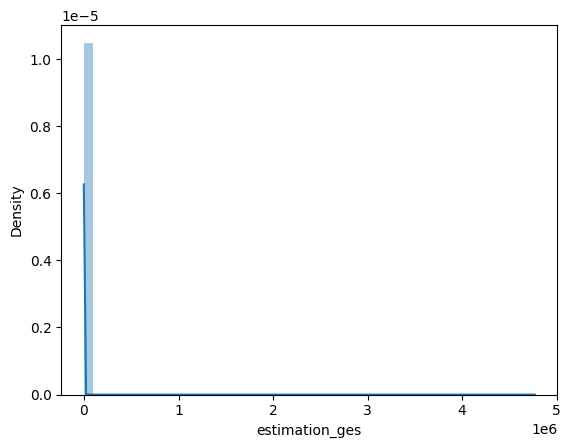

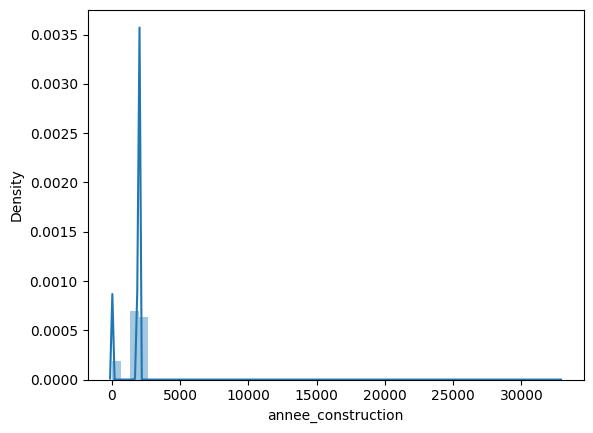

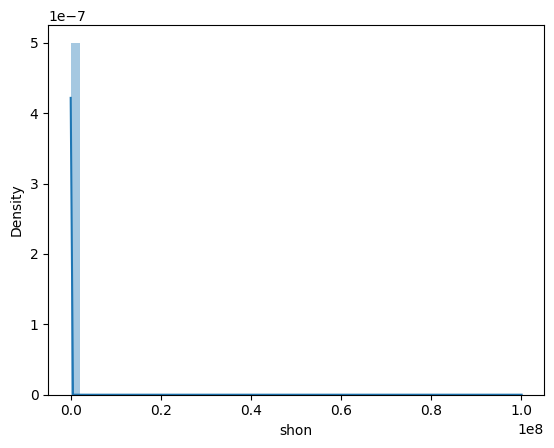

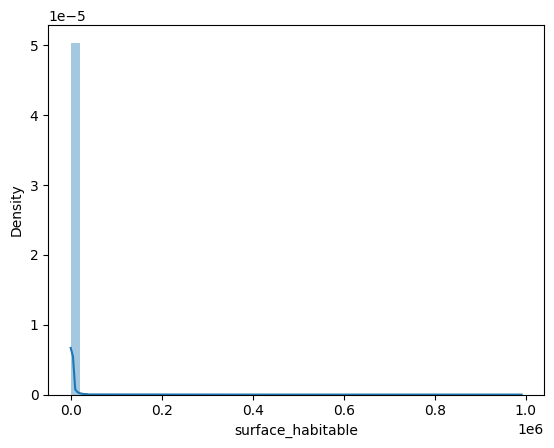

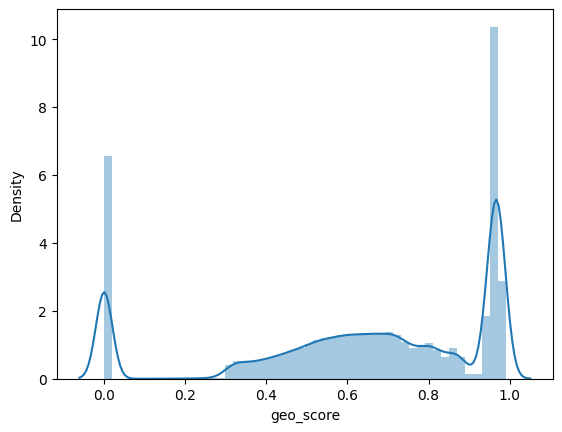

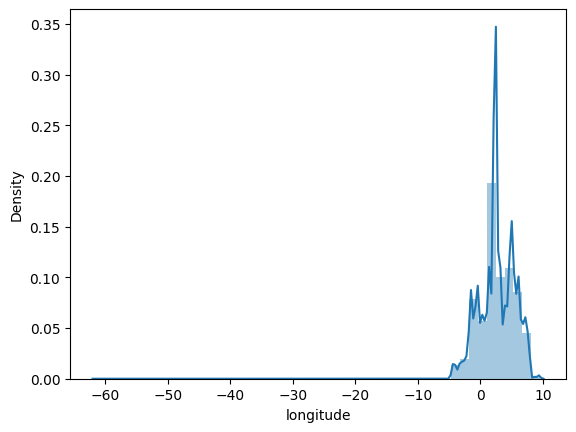

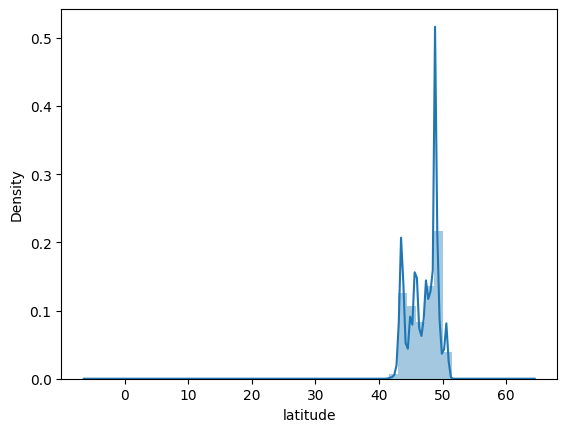

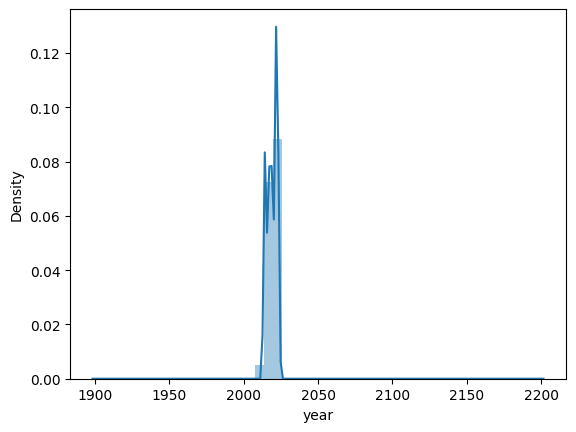

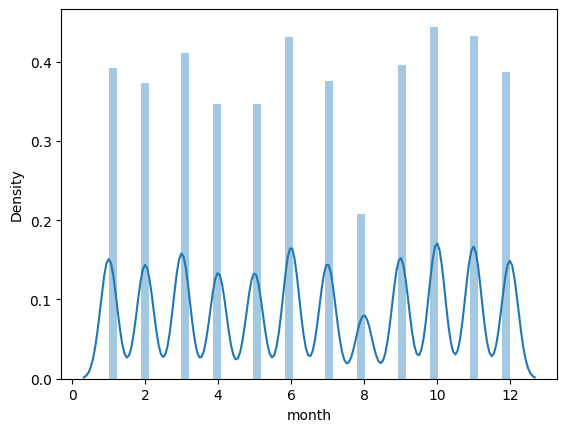

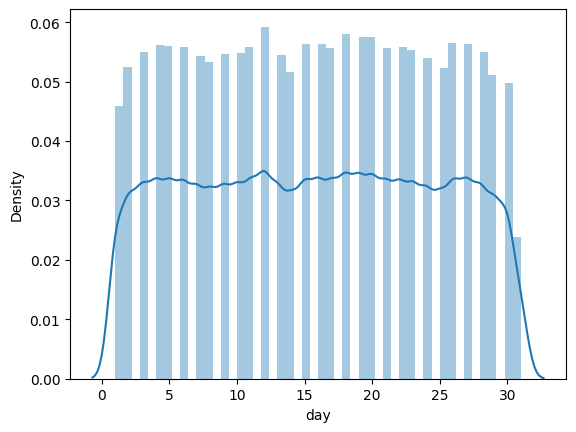

In [27]:
for col in df3.select_dtypes('float'):
    plt.figure()
    sns.distplot(df3[col].dropna())
    
    

In [28]:
len(df3.dropna(subset=['estimation_ges']))

712569

In [29]:
df3 = df3[(df3['estimation_ges'].lt(200) | df3['estimation_ges'].isna()) & (df3['annee_construction'].lt(2026) | df3['annee_construction'].isna()) & (df3['shon'].lt(6000) | df3['shon'].isna()) & (df3['surface_habitable'].lt(4000) | df3['surface_habitable'].isna()) & (df3['year'].le(2025) | df3['year'].isna()) & (df3['year'].ge(2011) | df3['year'].isna())]
df3['estimation_ges'] = df3['estimation_ges'].replace(0, np.nan)
df3['geo_score'] = df3['geo_score'].replace(0, np.nan)
df3['annee_construction'] = df3['annee_construction'].replace(0, np.nan)
df3[['annee_construction']]=df3[['annee_construction']].replace(1, np.nan)
df3['shon'] = df3['shon'].replace(0, np.nan)
df3['surface_habitable'] = df3['surface_habitable'].replace(0, np.nan)
len(df3.dropna(subset=['estimation_ges']))

446460

In [30]:
a=df3[['annee_construction']].min()
print(a)
b=df3[['estimation_ges']].min()
print(b)

annee_construction   -1.0
dtype: float64
estimation_ges   -31.3
dtype: float64


In [31]:
len(df3.dropna(subset=['estimation_ges']))

446460

In [32]:
df3 = df3[(df3['estimation_ges'].ge(0) | df3['estimation_ges'].isna()) & (df3['annee_construction'].ge(1900) | df3['annee_construction'].isna()) & (df3['geo_score'].ge(0.3) | df3['geo_score'].isna()) & (df3['latitude'].ge(40) | df3['latitude'].isna()) & (df3['latitude'].le(55) | df3['latitude'].isna()) & (df3['longitude'].ge(-6) | df3['longitude'].isna()) & (df3['longitude'].le(11) | df3['longitude'].isna())]


In [33]:
len(df3.dropna(subset=['estimation_ges']))

441176

C:\Users\tomde\AppData\Local\Temp\ipykernel_18380\1565793411.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col].dropna())
C:\Users\tomde\AppData\Local\Temp\ipykernel_18380\1565793411.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[col].dropna())
C:\Users\tomde\AppData\Local\Tem

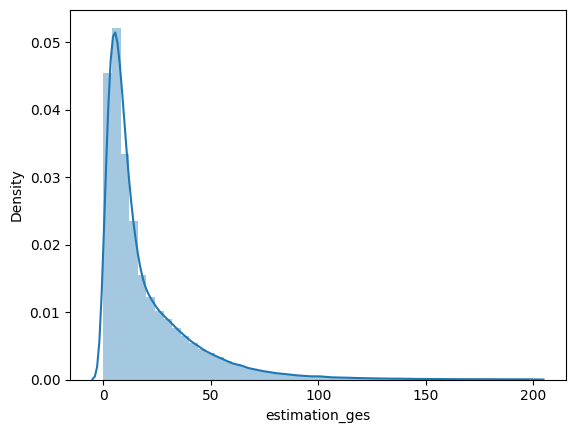

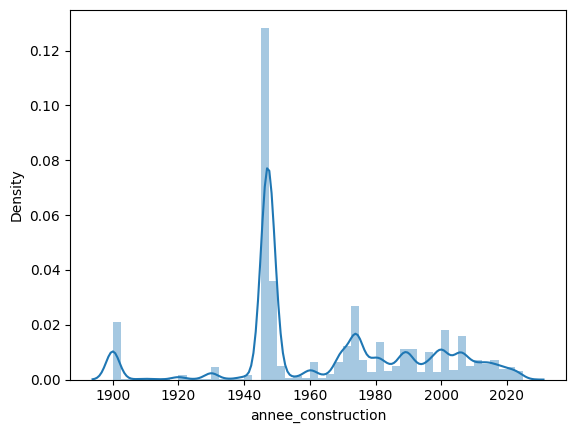

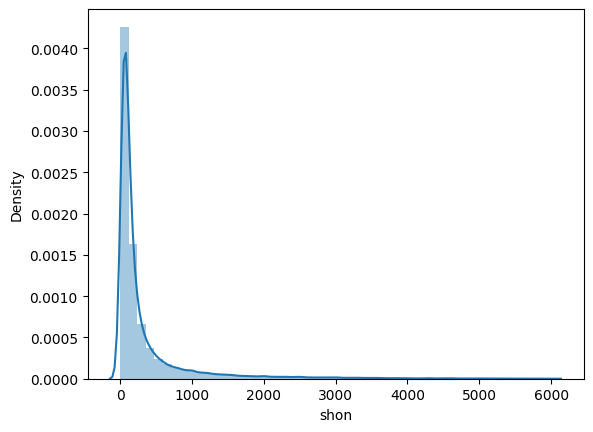

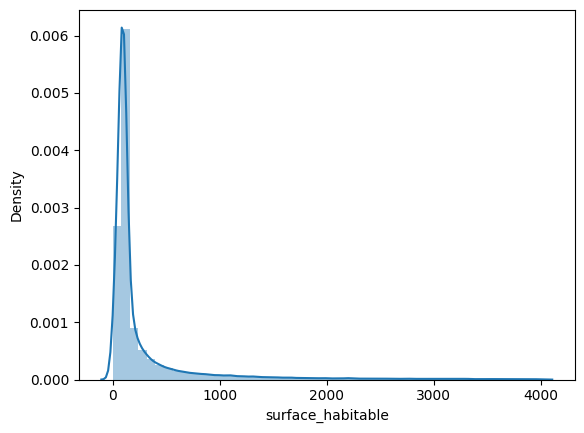

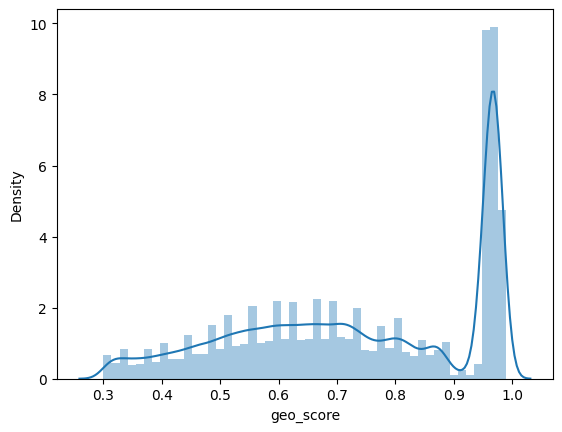

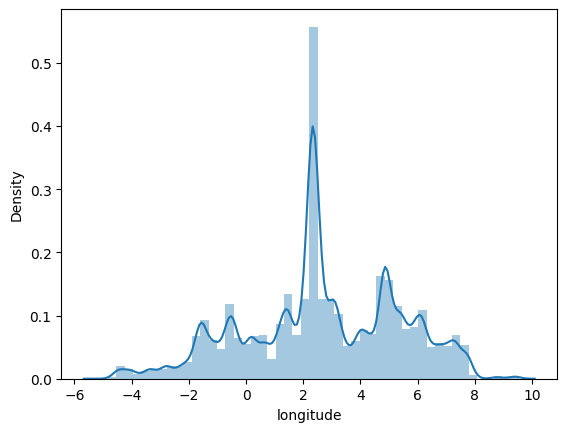

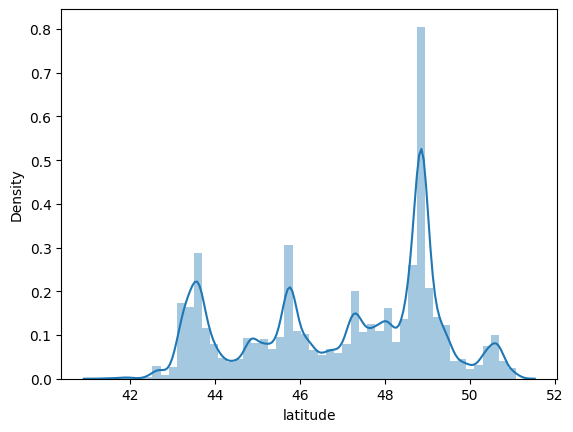

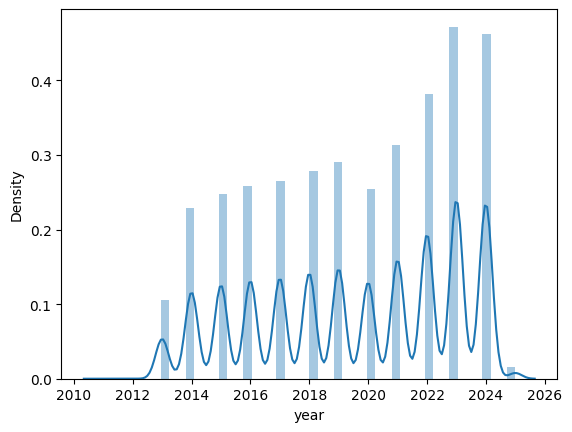

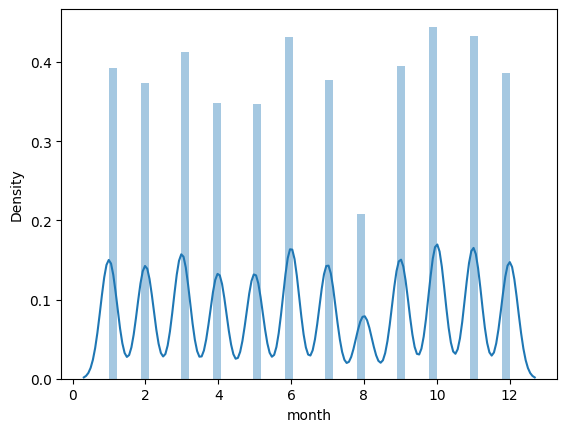

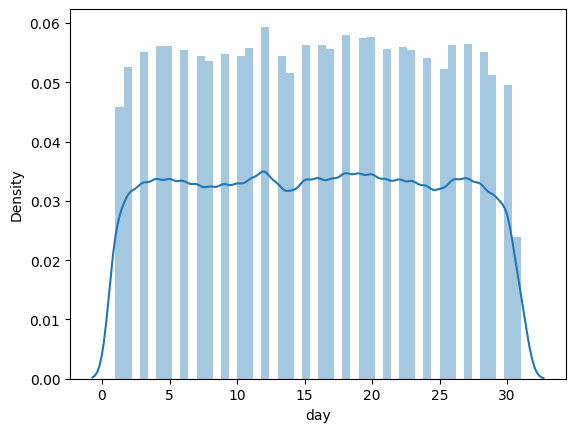

In [34]:
for col in df3.select_dtypes('float'):
    plt.figure()
    sns.distplot(df3[col].dropna())

<Axes: ylabel='date_visite_diagnostiqueur'>

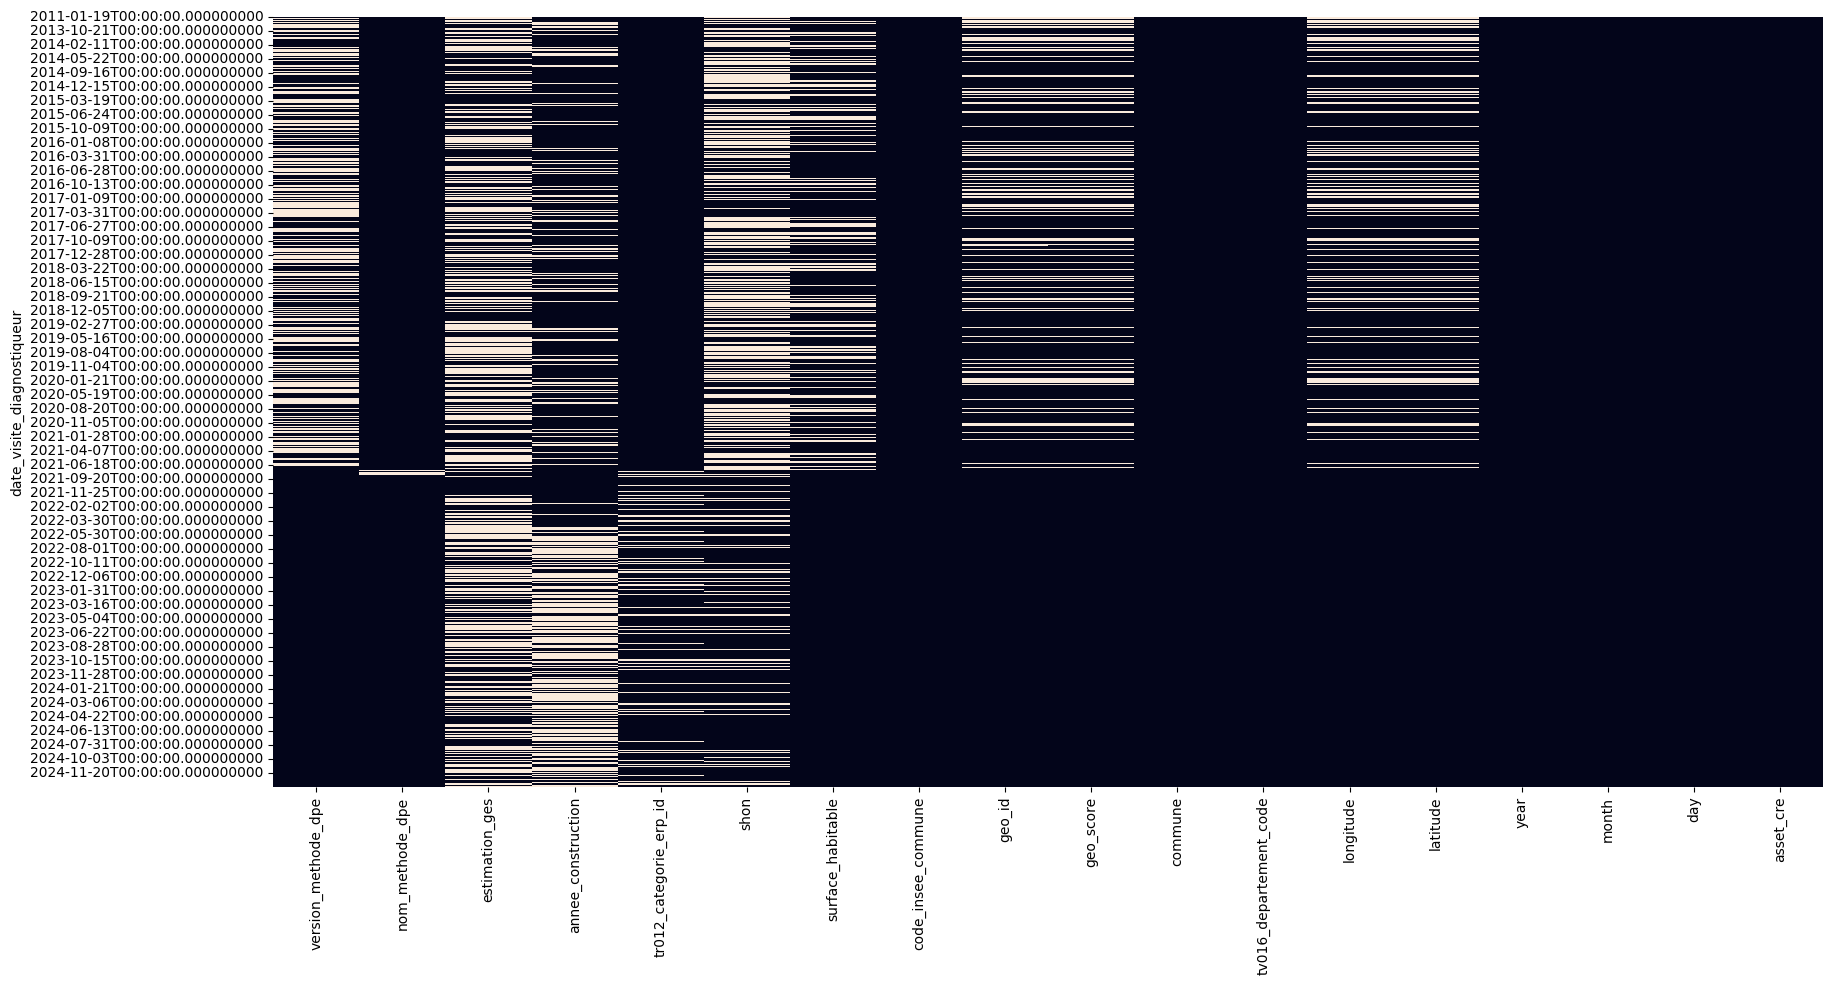

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.isna(),cbar=False)

In [36]:
len(df3.dropna(subset=['estimation_ges']))

441176

Corrélation variables continues

<Axes: >

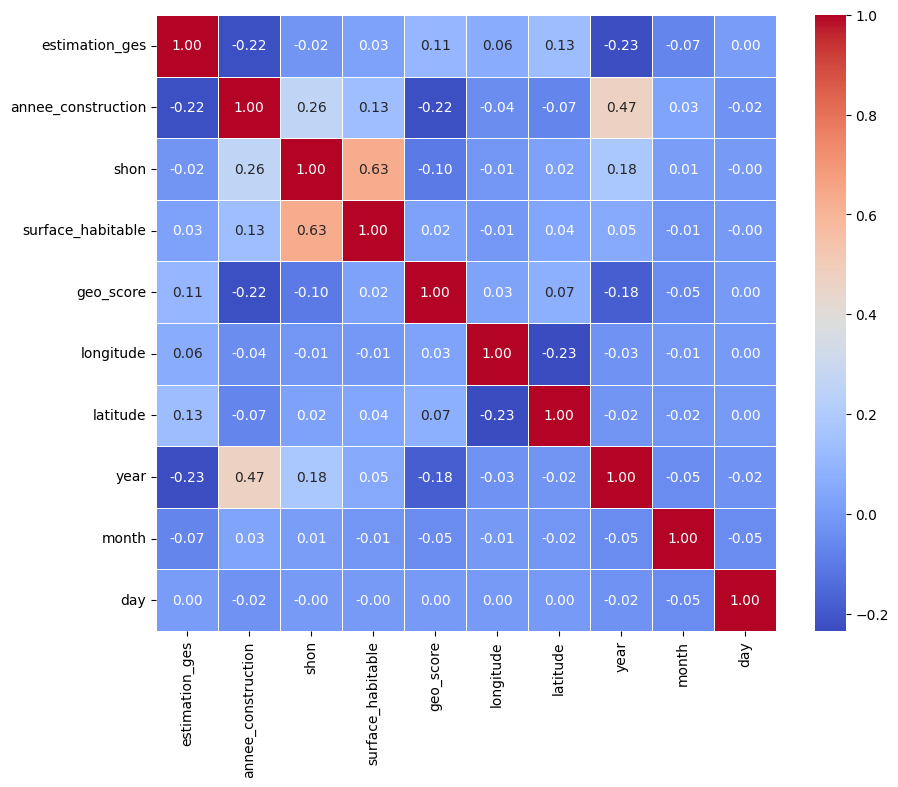

In [37]:

plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(df3.select_dtypes('float').dropna().corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

Etude donnée catégoriques

In [38]:
for col in df3.select_dtypes('object'):
  print(f'{col :-<50} {len(df3[col].unique())}')

version_methode_dpe------------------------------- 83
nom_methode_dpe----------------------------------- 165
tr012_categorie_erp_id---------------------------- 12
code_insee_commune-------------------------------- 23364
geo_id-------------------------------------------- 461276
commune------------------------------------------- 45451
tv016_departement_code---------------------------- 97
asset_cre----------------------------------------- 5


In [39]:
df3.select_dtypes('object').head()

,version_methode_dpe,nom_methode_dpe,tr012_categorie_erp_id,code_insee_commune,geo_id,commune,tv016_departement_code,asset_cre
date_visite_diagnostiqueur,,,,,,,,
2011-01-19,NaN,Méthode Facture,\N,26004,NaN,ALIXAN,26,"Bâtiment à usage principale de bureau, d'admin..."
2011-01-26,NaN,Méthode Facture,\N,19031,19031_2872_00019,BRIVE-LA-GAILLARDE,19,"Bâtiment à usage principale de bureau, d'admin..."
2011-01-31,NaN,Méthode Facture,\N,49007,49007_6032_00002,Angers,02,"Bâtiment à usage principale de bureau, d'admin..."
2011-01-31,V2012,3CL - DPE,5,64054,64054_0050_00027,BORDERES,64,Autres
2011-04-04,NaN,Méthode Facture,5,71153,71153_0120_00027,LE CREUSOT,71,"Bâtiment à usage principale de bureau, d'admin..."


<Axes: xlabel='tr012_categorie_erp_id', ylabel='Count'>

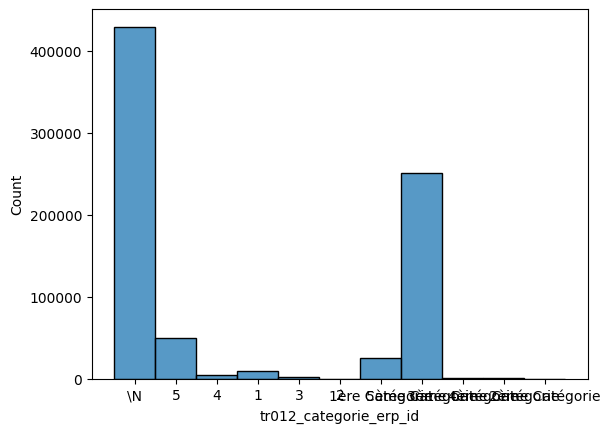

In [40]:
plt.figure()
sns.histplot(df3['tr012_categorie_erp_id'].dropna())

In [41]:
df3['tr012_categorie_erp_id'].unique()

array(['\\N', '5', '4', '1', '3', '2', '1ère Catégorie', '5ème Catégorie',
       '3ème Catégorie', nan, '4ème Catégorie', '2ème Catégorie'],
      dtype=object)

In [42]:
df3['tr012_categorie_erp_id'] = df3['tr012_categorie_erp_id'].replace('\\N', np.nan)


<Axes: ylabel='date_visite_diagnostiqueur'>

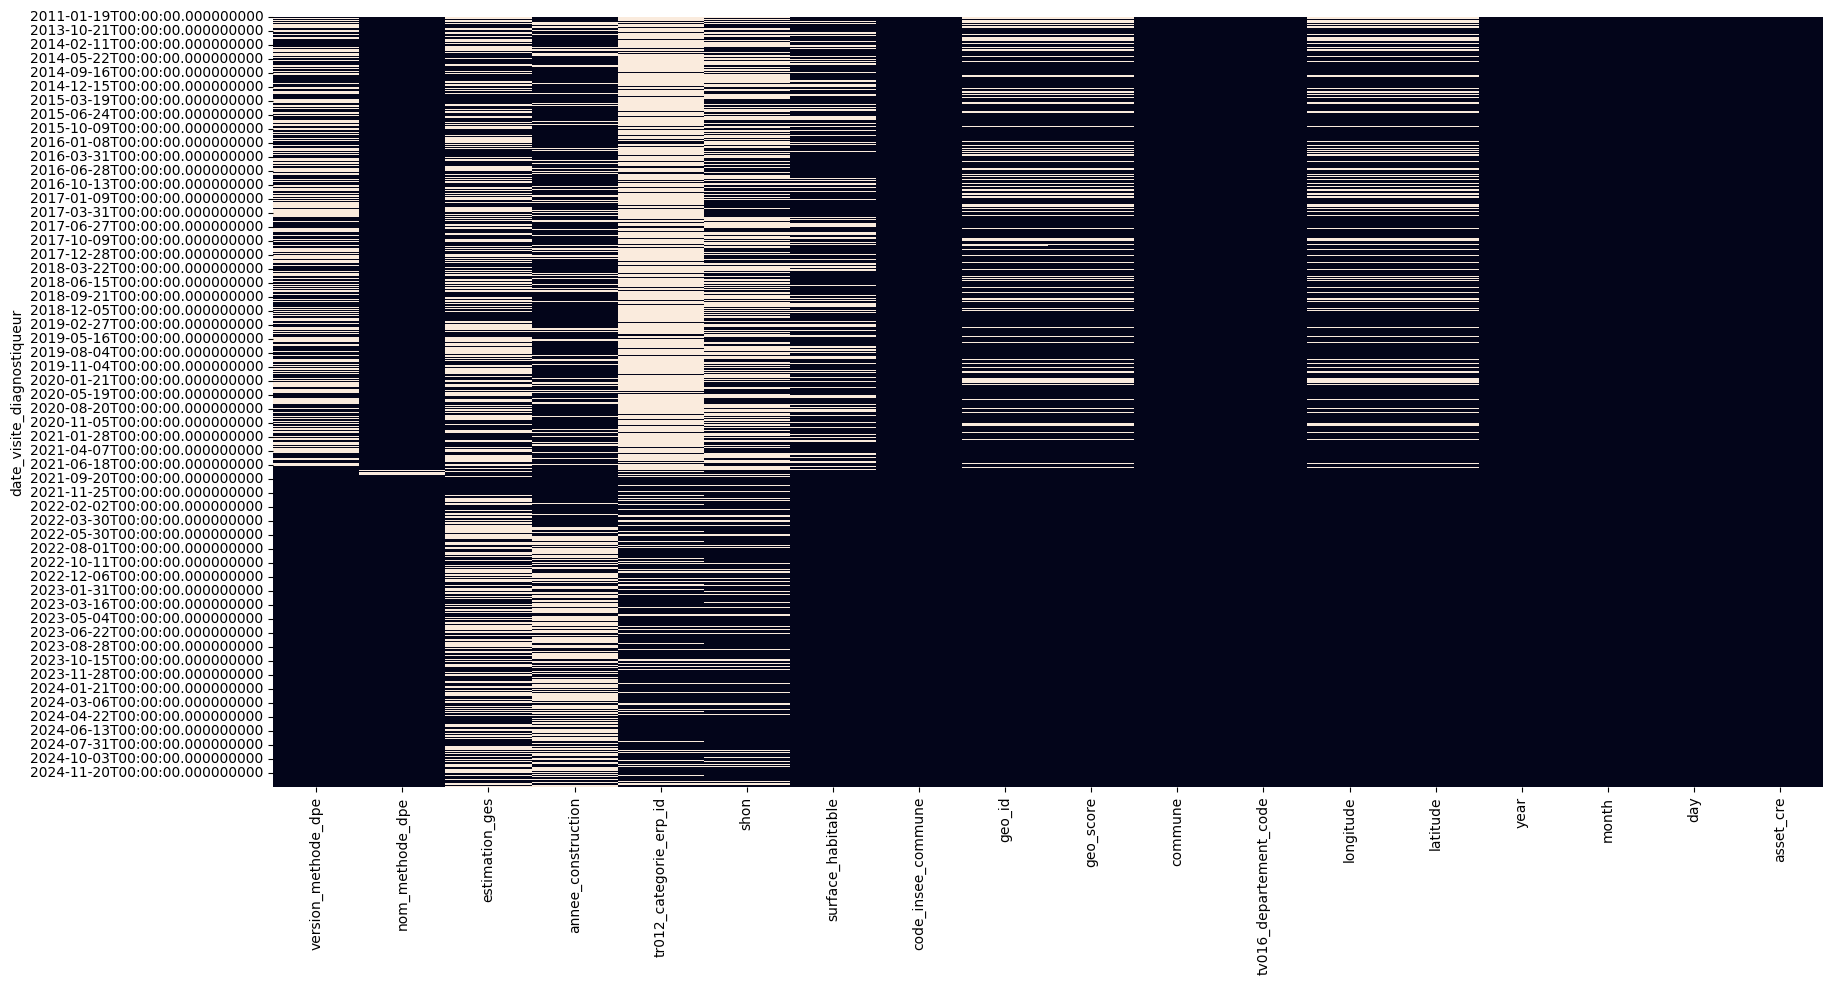

In [43]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.isna(),cbar=False)

Trop de NaN dans tr12_categorie_erp_id

In [44]:
df3 = df3.drop(columns=['tr012_categorie_erp_id'])

In [45]:
df3['version_methode_dpe'].dropna().unique()

array(['V2012', '1.3', 'VERSION_2012', '7.1.112.6166', 'V1.3', 'V2005',
       'Version 1.3', 'facture', '3CL-DPE, version 1.3', '2012', 'v15c',
       'RT2005', '6.3abis', 'RT2012', 'non communiquée', 'v2012', '1.0',
       '6.2', '2012 1.3', '1,3', 'DPEV2012', '1.1.6.3', '6.3', '6.3.0.0',
       '7.0.0.0', '6.1', '6.3A BIS VENTE', '6.3c bis vente',
       '6.3 C BIS VENTE', '6.3 a BIS VENTE', '1.1.3', '6.3 a bis vente',
       '6.3  c bis vente', '6.3c', '6.3 c bis vente', '6.3 a vente',
       '7.2.0.0', '6.3 c', '7.1.0.0', '1.1.6.1', '7.2.234.6579',
       '6.3a vente', '7.4.0.0', 'vente', '6.3 a', 'Sur factures', '6.3 A',
       '(v 2012)', '6.B', '6.3a', '6.3 A BIS VENTE', '6.a bis vente',
       '6.C BIS VENTE', '7.5.0.2', '7.5.0.1', '6.3A', 'V 1.3 - 2012',
       '6.3C', '6.a', '6.3b', '7.5.0.0', '2012 7.5.0.2', '6.3 C',
       '7.5.0.3', '6.3 cbis', '8.0.0.0', 'V1.5', '8.1.0.0', '7.3.0.0',
       'v 1.3  - 2012', '7.1.35.8008', 'V1.3   2012', '6.c', 'V 2.0', 1.0,
       2.0, 2

<Axes: xlabel='version_methode_dpe', ylabel='Count'>

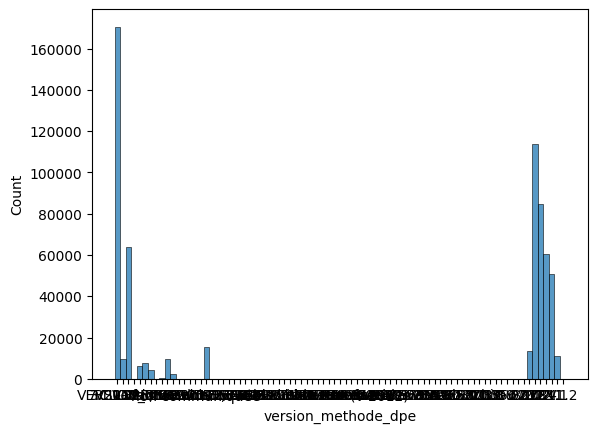

In [46]:
plt.figure()
sns.histplot(df3['version_methode_dpe'].dropna().astype(str))

In [47]:
# Calculer les fréquences des catégories
frequencies = df3['version_methode_dpe'].value_counts().to_frame() / len(df3)
frequencies.head(30)
# Sélectionner les catégories ayant une fréquence supérieure à 1e-3
categories_above_threshold = frequencies[frequencies[['count']] > 1e-3]
categories_valides = categories_above_threshold.index.tolist()
categories_valides.append(np.nan)
# Afficher les catégories filtrées
print(categories_valides)

['V2012', 2.3, 2.2, 'VERSION_2012', 2.4, 2.1, 1.0, 2.0, 1.1, '1.3', '2012', 'V2005', 'V1.3', 'Version 1.3', 'v15c', '3CL-DPE, version 1.3', 'RT2012', '7.5.0.2', '6.3', '8.1.0.0', '1.1.3', '1.0', '6.2', 'RT2005', '7.1.0.0', '8.0.0.0', '1.1.6.3', '7.1.112.6166', '7.5.0.3', '6.3.0.0', '7.4.0.0', '7.5.0.1', 'non communiquée', '7.2.0.0', 'V 1.3 - 2012', '6.3c', '7.0.0.0', '6.3 c bis vente', 'V1.3   2012', '2012 1.3', 'v2012', '1,3', '2012 7.5.0.2', '6.3 C BIS VENTE', 'V 2.0', '6.3c bis vente', 'DPEV2012', 'V1.5', '(v 2012)', '6.3a', '6.3A', '6.3abis', '6.3 a vente', '6.3C', '6.3 c', 'v 1.3  - 2012', '6.1', '7.3.0.0', '1.1.6.1', '7.5.0.0', '6.3 a bis vente', '6.3  c bis vente', '7.1.35.8008', '6.c', '6.3a vente', '6.3 cbis', 'Sur factures', 'facture', '6.3A BIS VENTE', '6.3 a BIS VENTE', '7.2.234.6579', 'vente', '6.3 a', '6.3 A', '6.3 C', '6.B', '6.3 A BIS VENTE', '6.a bis vente', '6.C BIS VENTE', '6.a', '6.3b', 'V1.2', nan]


In [ ]:
df3 = df3[df3['version_methode_dpe'].isin(categories_valides)]
print(len(df3_))

848251


<Axes: xlabel='version_methode_dpe', ylabel='Count'>

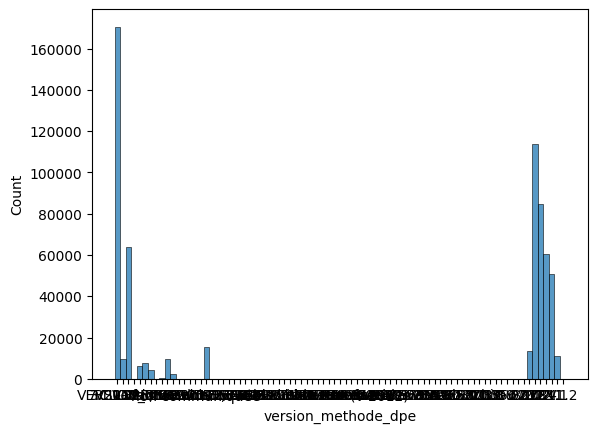

In [ ]:

plt.figure()
sns.histplot(df3['version_methode_dpe'].dropna().astype(str))

<Axes: xlabel='nom_methode_dpe', ylabel='Count'>

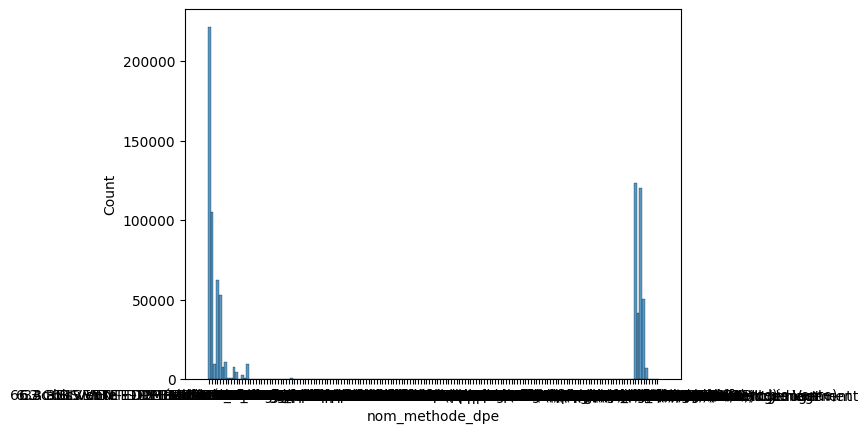

In [50]:
plt.figure()
sns.histplot(df3['nom_methode_dpe'].dropna().astype(str))

In [51]:
# Calculer les fréquences des catégories
frequencies = df3['nom_methode_dpe'].value_counts().to_frame() / len(df3)
frequencies.head(30)
# Sélectionner les catégories ayant une fréquence supérieure à 1e-3
categories_above_threshold = frequencies[frequencies[['count']] > 1e-3].dropna()

# Afficher les catégories filtrées
print(categories_above_threshold.index)

Index(['Méthode Facture', 'dpe tertiaire facture', 'dpe tertiaire vierge',
       '3CL - DPE', 'FACTURE', 'FACTURE - DPE',
       'dpe tertiaire vierge dans un bâtiment de logement',
       'dpe tertiaire facture dans un bâtiment de logement', 'FACTURE SEULE',
       'facture', 'Factures', 'th-CE', 'DPE VIERGE',
       'dpe tertiaire bâtiment neuf', '3CL', 'Facture'],
      dtype='object', name='nom_methode_dpe')


In [52]:
df3_ = df3[df3['nom_methode_dpe'].isin(categories_above_threshold.index)]
print(len(df3_))

836512


In [53]:
df3_['nom_methode_dpe'].dropna().unique()

array(['Méthode Facture', '3CL - DPE', 'facture', 'FACTURE',
       'FACTURE - DPE', 'DPE VIERGE', 'FACTURE SEULE', 'th-CE', '3CL',
       'Facture', 'Factures', 'dpe tertiaire facture',
       'dpe tertiaire facture dans un bâtiment de logement',
       'dpe tertiaire vierge',
       'dpe tertiaire vierge dans un bâtiment de logement',
       'dpe tertiaire bâtiment neuf'], dtype=object)

<Axes: xlabel='nom_methode_dpe', ylabel='Count'>

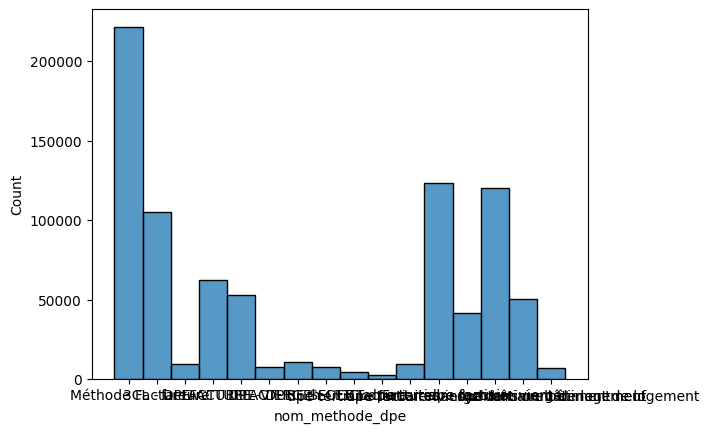

In [54]:
plt.figure()
sns.histplot(df3_['nom_methode_dpe'].dropna().astype(str))

In [55]:
len(df3[['estimation_ges']].dropna())

441176

Finalement je viens de me rendre compte que nom_methode_dpe et version ethode_dpe ne seront pas accessibles pour des estimations données futurs.
En effet ces données sont établie lors du dpe, or on ne peut pas faire de dpe sur des données futurs.

In [56]:
df3 = df3.drop(columns=['nom_methode_dpe', 'version_methode_dpe'])

In [57]:

frequencies = df3['tv016_departement_code'].value_counts().to_frame() / len(df3)
frequencies.head(100)

,count
tv016_departement_code,
75,0.067204
69,0.038997
59,0.034098
13,0.033942
44,0.023454
33,0.023426
31,0.023276
06,0.021667
92,0.020534


In [58]:
# Dictionnaire de mapping inverse des départements
departements_mapping_inverse = {
    '2A': '96',  # 2A devient 96
    '2B': '97',  # 2B devient 97
    # Ajouter d'autres mappings inversés si nécessaire
}

# Appliquer le mapping inverse à la colonne 'departement'
df3['tv016_departement_code'] = df3['tv016_departement_code'].replace(departements_mapping_inverse)

# Afficher le DataFrame avec la nouvelle colonne mappée inversée
df3['tv016_departement_code'].value_counts().to_frame() / len(df3)

,count
tv016_departement_code,
75,0.067204
69,0.038997
59,0.034098
13,0.033942
44,0.023454
33,0.023426
31,0.023276
06,0.021667
92,0.020534


Les variables qu'il reste désormais à traiter sont : code_insee_commune, geo_id et commune

In [59]:
df3[['geo_id','code_insee_commune','commune']].head()

,geo_id,code_insee_commune,commune
date_visite_diagnostiqueur,,,
2011-01-19,NaN,26004,ALIXAN
2011-01-26,19031_2872_00019,19031,BRIVE-LA-GAILLARDE
2011-01-31,49007_6032_00002,49007,Angers
2011-01-31,64054_0050_00027,64054,BORDERES
2011-04-04,71153_0120_00027,71153,LE CREUSOT


Etude geo_id :

Exemple : 64054_0050_00027

64054 → Correspond au Code INSEE de la commune
64 : Département des Pyrénées-Atlantiques
054 : Code de la commune 
0050 → Faire référence à une section cadastrale ou un secteur géographique.
00027 → Numéro de parcelle ou d’une subdivision cadastrale.

Toutes les valeurs de geo_id ne prennent pas forcémment le même format, par exemple 64054_0050_00027 et 78048_0430. 
Il faut unniquement conserver les 9 premiers chiffres.

In [60]:
def clean_geo_id(df, column_name): 
    """
    Extrait les 11 premiers caractères des valeurs de la colonne spécifiée
    et supprime l'underscore en 6e position.

    Args:
    df (pd.DataFrame): Le DataFrame contenant la colonne à traiter.
    column_name (str): Le nom de la colonne contenant les GEO ID.

    Returns:
    pd.DataFrame: DataFrame avec la colonne mise à jour.
    """ 
    df[column_name] = df[column_name].astype(str).str[:10].str.replace(r"(.{5})_", r"\1", regex=True)
    return df

# Appliquer la fonction sur la colonne 'geo_id'
df3 = clean_geo_id(df3, 'geo_id')

# Afficher le DataFrame mis à jour
df3[['geo_id','code_insee_commune','commune','latitude','longitude']].head()

,geo_id,code_insee_commune,commune,latitude,longitude
date_visite_diagnostiqueur,,,,,
2011-01-19,nan,26004,ALIXAN,NaN,NaN
2011-01-26,190312872,19031,BRIVE-LA-GAILLARDE,45.154174,1.534671
2011-01-31,490076032,49007,Angers,47.465137,-0.595516
2011-01-31,640540050,64054,BORDERES,43.200653,-0.286804
2011-04-04,711530120,71153,LE CREUSOT,46.793673,4.426975


La 3eme ligne est intéressante, geo_id ne correspond pas code_insee_commune ni à commune. Cependant en rentrant les coordonées géographique sur google map, on voit que 48.919624	2.262997 correspond à la commune de Bois-Colombes qui a pour code insee 92009.

Geo_id est donc fiable.

Code_insee commune peut etre vue comme un encodage de commune (code insee unique par colonne d'après des recherches) : on peut dropper la colonne commune.

In [61]:
df3.drop(columns='commune',inplace=True)

Encodage des variables catégorielles

In [62]:
df3.select_dtypes('object').head()

,code_insee_commune,geo_id,tv016_departement_code,asset_cre
date_visite_diagnostiqueur,,,,
2011-01-19,26004,nan,26,"Bâtiment à usage principale de bureau, d'admin..."
2011-01-26,19031,190312872,19,"Bâtiment à usage principale de bureau, d'admin..."
2011-01-31,49007,490076032,02,"Bâtiment à usage principale de bureau, d'admin..."
2011-01-31,64054,640540050,64,Autres
2011-04-04,71153,711530120,71,"Bâtiment à usage principale de bureau, d'admin..."


In [63]:
# Convertir les colonnes en float
cols_to_convert = ["code_insee_commune", "geo_id", "tv016_departement_code"]
df3[cols_to_convert] = df3[cols_to_convert].apply(pd.to_numeric, errors='coerce')

C:\Users\tomde\AppData\Local\Temp\ipykernel_18380\1906444037.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3[['code_insee_commune']].dropna())


<Axes: ylabel='Density'>

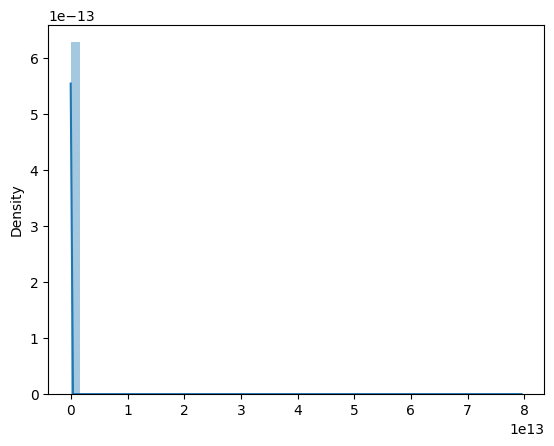

In [64]:
plt.figure()
sns.distplot(df3[['code_insee_commune']].dropna())

In [65]:
df3_= df3[(df3['code_insee_commune'].lt(100000) | df3['code_insee_commune'].isna())]

C:\Users\tomde\AppData\Local\Temp\ipykernel_18380\2140757843.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df3_[['code_insee_commune']].dropna())


<Axes: ylabel='Density'>

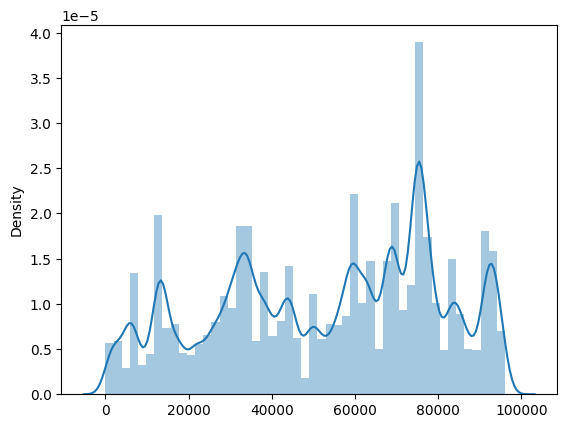

In [66]:
plt.figure()
sns.distplot(df3_[['code_insee_commune']].dropna())

<Axes: ylabel='date_visite_diagnostiqueur'>

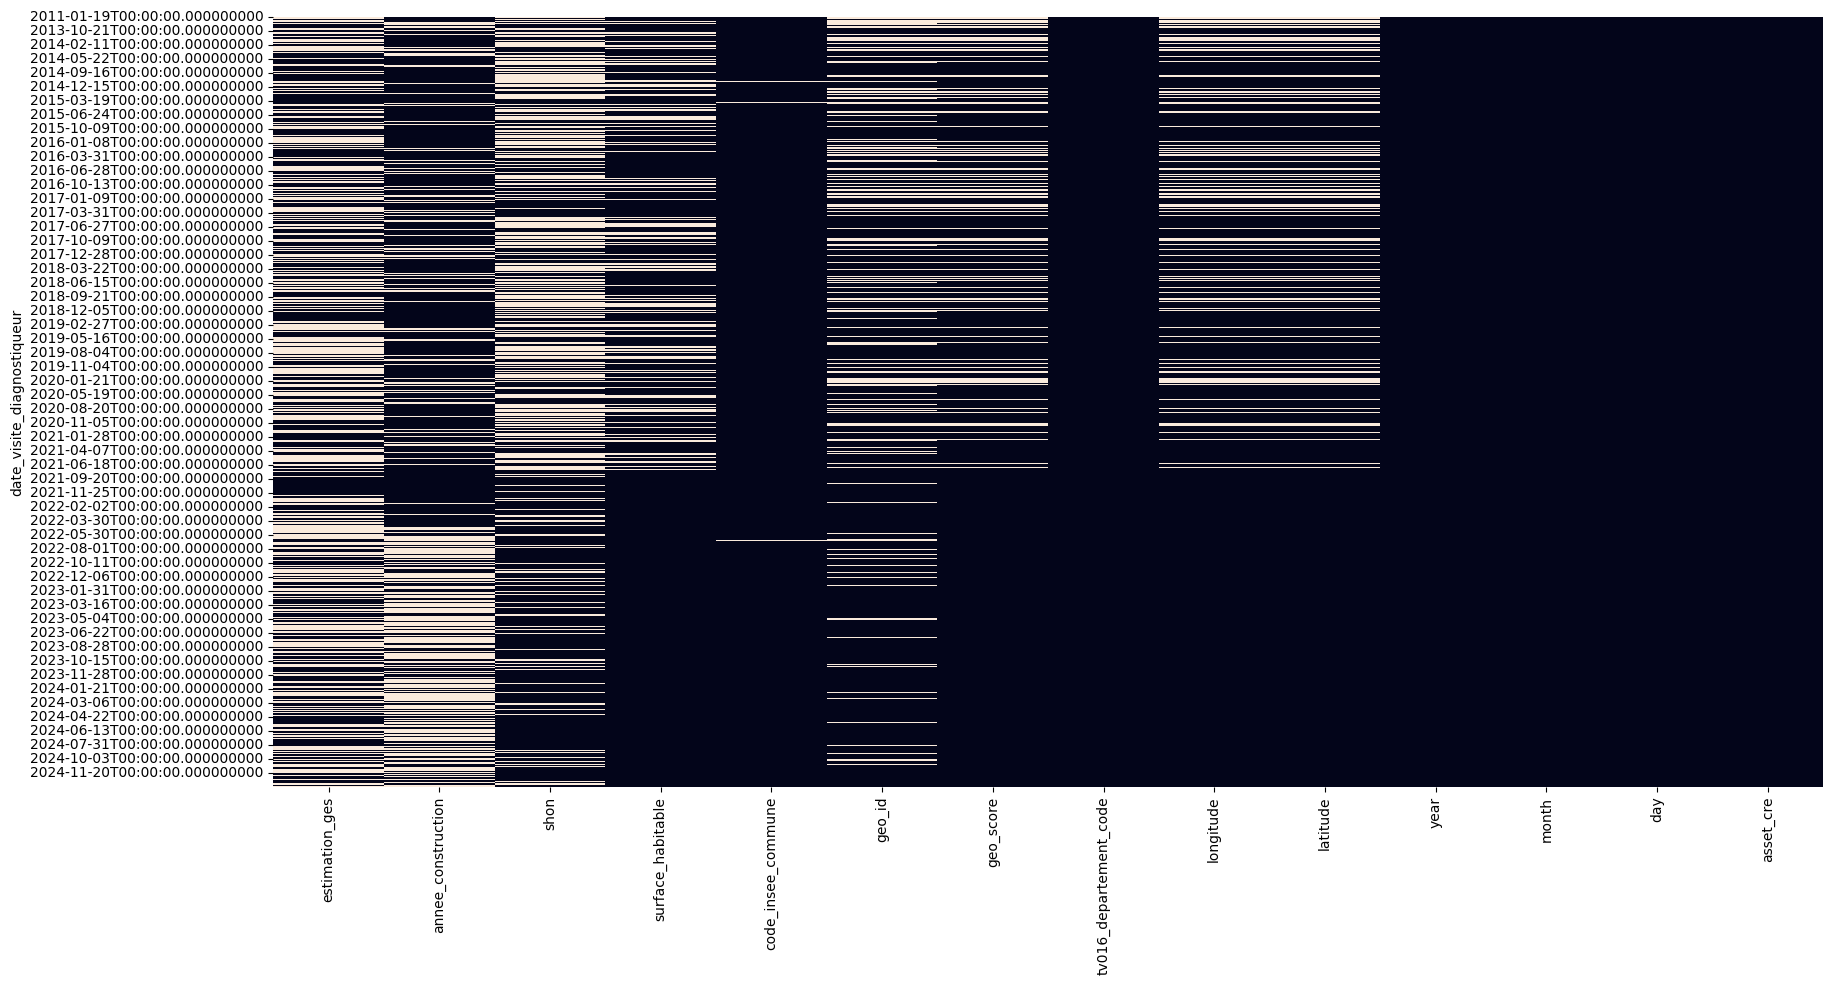

In [67]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.isna(),cbar=False)

Geo_id a finalement beaucoup de NaN comparé à code_insee_commune alors que ces deux colonnes comportent quasiment la même information : geo_id apporte de la granularité au sein d'une ville, alors que code_insee est deja très granulaire.
On supprime donc cette colonne.

In [68]:
df3 = df3.drop(columns=['geo_id'])

In [69]:
df3['time'] = (df3.index - df3.index.min()).days

<Axes: ylabel='date_visite_diagnostiqueur'>

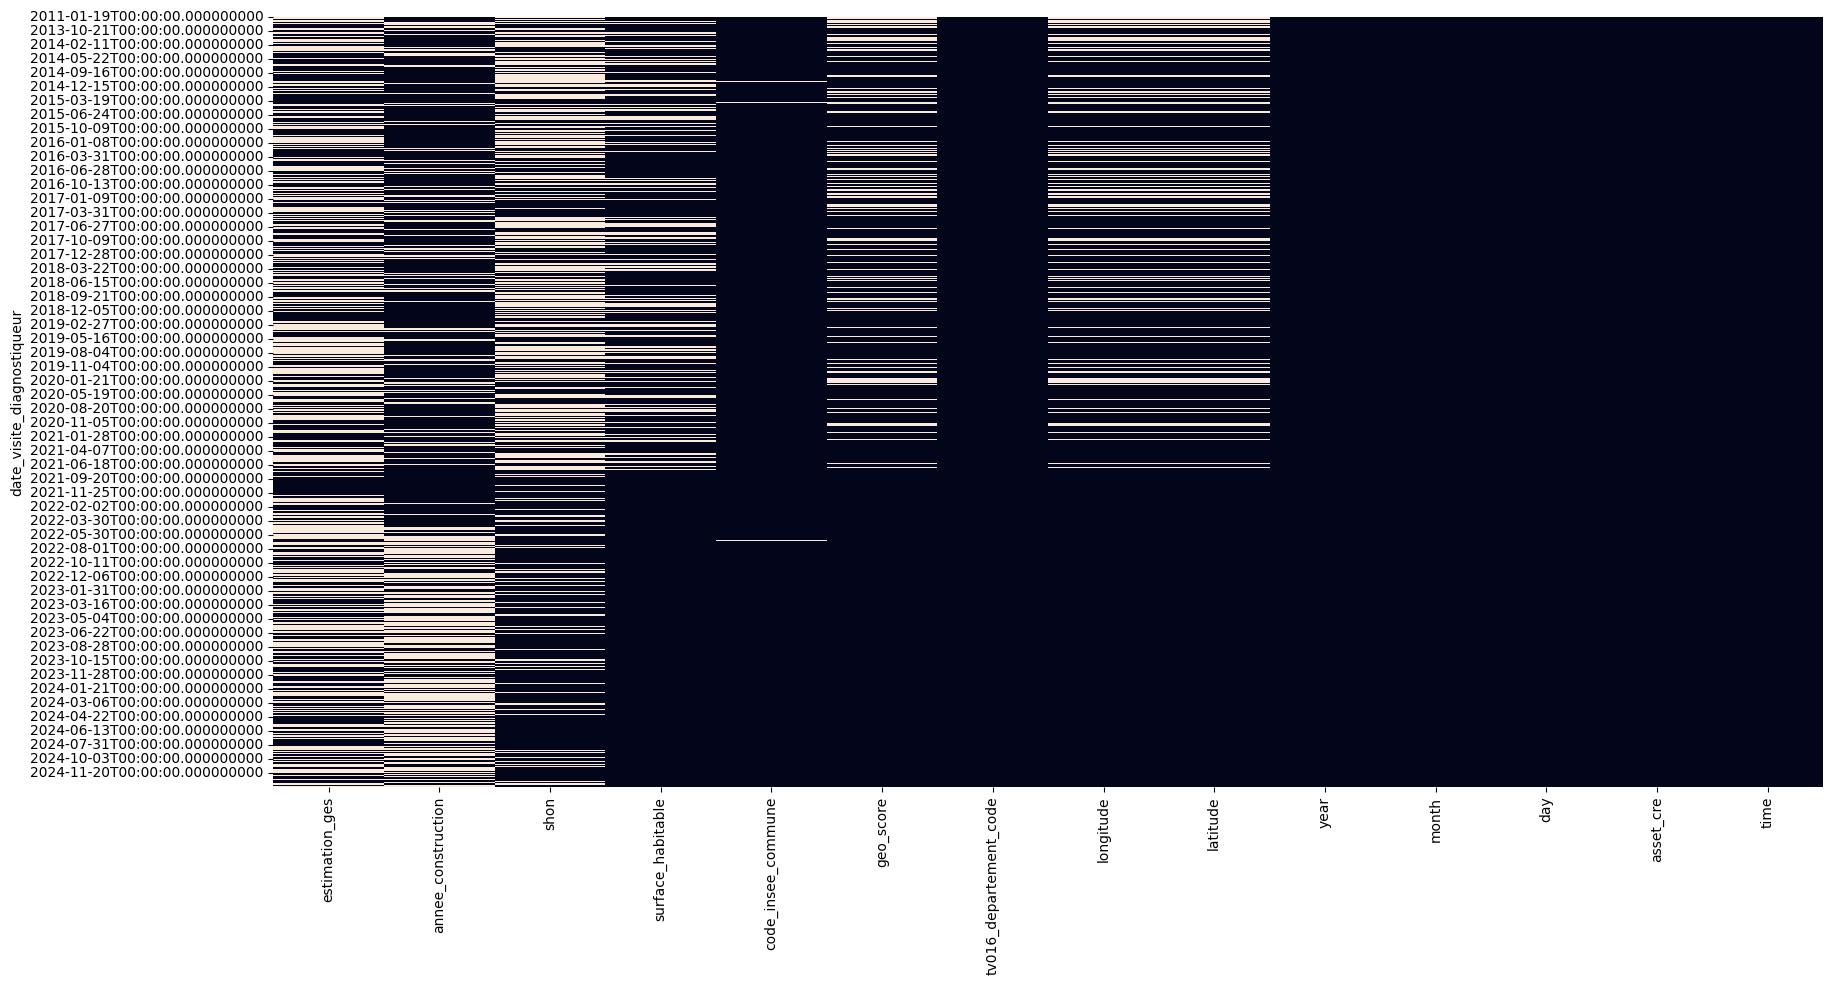

In [70]:
plt.figure(figsize=(20,10))
sns.heatmap(df3.isna(),cbar=False)

In [71]:
df3_incoded = pd.get_dummies(df3, columns=['asset_cre'])

<Axes: >

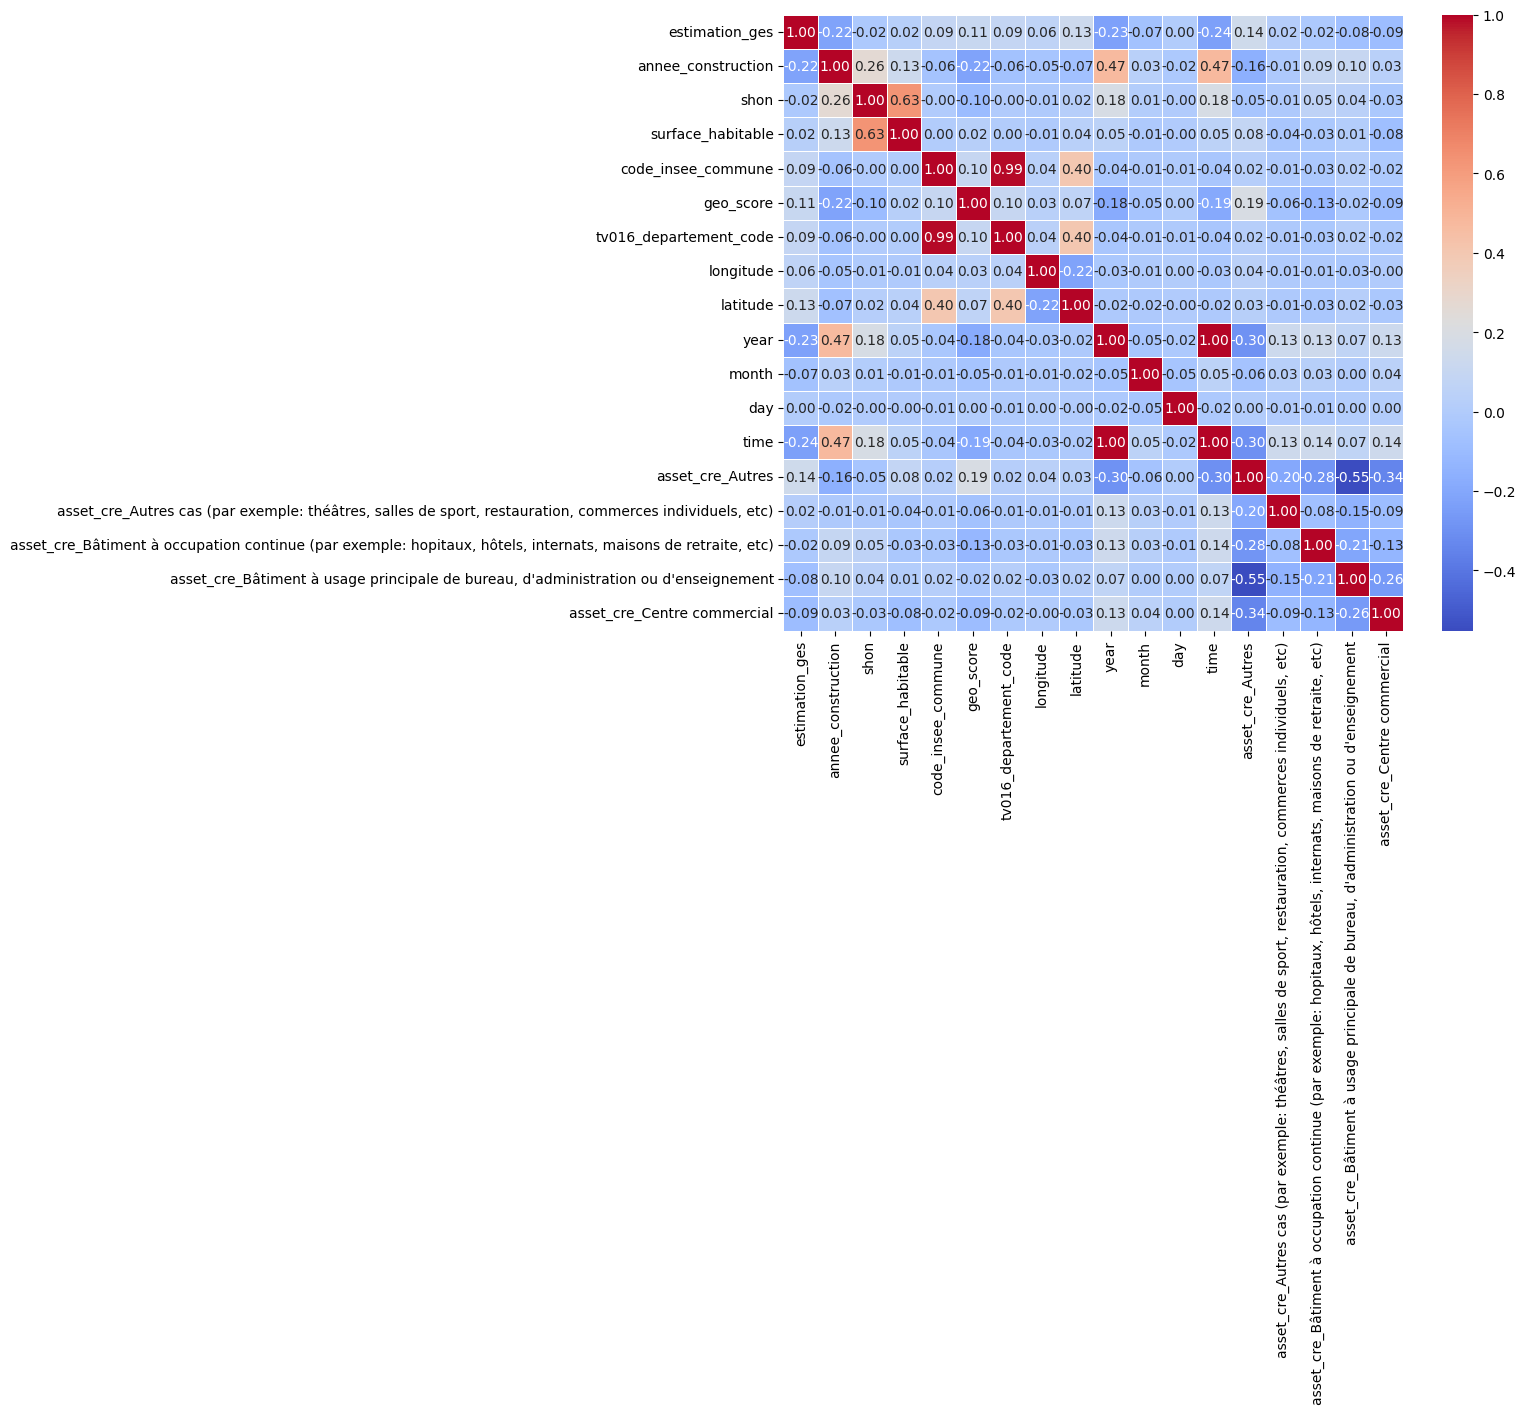

In [72]:

plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(df3_incoded.dropna().corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

In [73]:
df3_incoded.to_csv('df3_encoded.csv', index=True)

In [74]:
df3.to_csv('df3.csv', index=True)